# Initial Set-Up

In [1]:
from mpl_toolkits.basemap import Basemap as Basemap

In [2]:
import pickle as pkl
import pandas as pd
import matplotlib
import os
import re

import collections
import datetime
import time

# import geopandas as gpd

import numpy as np

import rasterio

from difflib import get_close_matches

from fuzzywuzzy import process
from fuzzywuzzy import fuzz

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


import seaborn as sns

import numpy as np

import scipy

from matplotlib.colors import LogNorm

from sklearn import preprocessing

import dask.dataframe as dd

import xclim


In [3]:
import intake
import intake_esm
import xarray as xr 
# import proplot as plot 
import matplotlib.pyplot as plt

In [4]:
hq = pd.read_csv("../../data/companyData/justHQs.csv") 


min_lat = hq.latitude.min()
max_lat = hq.latitude.max()

min_lon = hq.longitude.min()
max_lon = hq.longitude.max()

In [ ]:
# necessary url
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
# open the catalog
dataframe = intake.open_esm_datastore(url)

In [ ]:
dataframe.df.columns

In [ ]:
start = time.time()
# experID = # 'ssp585'
# varID   = 'pr'
experiments = ['ssp585'] # 'ssp126',

variables   = ['tasmax']# ,'']

i = 1

for experID in experiments:
    for varID in variables:
        for i in range(1,51):
            memID   = 'r' + str(i) +'i1p1f1'

            print(experID,varID,memID)
            models = dataframe.search(experiment_id =[experID],
                                      table_id      ='day',
                                      variable_id   =varID,
                                      institution_id='MIROC',
                                      member_id     =memID)


            datasets = models.to_dataset_dict(aggregate = False)
            x = list(datasets.keys())
            # print(x)
            dset = datasets[x[0]]
            dset.attrs['intake_esm_varname'] = 'none'

            dset.coords['lon'] = (dset.coords['lon'] + 180) % 360 - 180
            dset = dset.sortby(dset.lon)


            dset = dset.sel(time=slice('1981-01-01','2039-12-31'),
                           lat=slice(min_lat,max_lat), 
                           lon=slice(min_lon,max_lon))



            dirName  = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + experID + '/' + varID + '/'

            filename = varID + '_day_MIROC6_' + experID + '_' + memID + '_gn.nc'
            print(dirName + filename)

            dset.to_netcdf(dirName + filename)

            print(time.time() - start)

models.df.experiment_id

In [99]:
memID = 'r4(.*?)i1p1f1'
print(memID)
models = dataframe.search(experiment_id=[experID],
                          table_id='day',
                          variable_id=['pr','tasmax'],
                          institution_id='MIROC',
                          member_id=memID)


datasets = models.to_dataset_dict(aggregate = False)
''' x = list(datasets.keys())
# print(x)
dset = datasets[x[0]]
dset.attrs['intake_esm_varname'] = 'none'

dset.coords['lon'] = (dset.coords['lon'] + 180) % 360 - 180
dset = dset.sortby(dset.lon)


dset = dset.sel(time=slice('2015-01-01','2039-12-31'),
               lat=slice(min_lat,max_lat), 
               lon=slice(min_lon,max_lon))

print(dset)

dirName  = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + experID + '/' + varID + '/'

filename = 'both' + '_day_MIROC6_' + experID + '_' + memID + '_gn.nc'
# varID + '_day_MIROC6_' + experID + '_' + memID + '_gn.nc'
print(dirName + filename)

dset.to_netcdf(dirName + filename)
'''

r4(.*?)i1p1f1

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


" x = list(datasets.keys())\n# print(x)\ndset = datasets[x[0]]\ndset.attrs['intake_esm_varname'] = 'none'\n\ndset.coords['lon'] = (dset.coords['lon'] + 180) % 360 - 180\ndset = dset.sortby(dset.lon)\n\n\ndset = dset.sel(time=slice('2015-01-01','2039-12-31'),\n               lat=slice(min_lat,max_lat), \n               lon=slice(min_lon,max_lon))\n\nprint(dset)\n\ndirName  = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + experID + '/' + varID + '/'\n\nfilename = 'both' + '_day_MIROC6_' + experID + '_' + memID + '_gn.nc'\n# varID + '_day_MIROC6_' + experID + '_' + memID + '_gn.nc'\nprint(dirName + filename)\n\ndset.to_netcdf(dirName + filename)\n"

In [10]:
np.var([5,9])

4.0

In [ ]:
models = dataframe.search(experiment_id='historical',
                              table_id='Amon',
                              variable_id='tas',
                              institution_id='NCAR',
                              member_id='r11i1p1f1')

In [3]:
'''baselineName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/mirocHQs_198199.csv'
baseline = pd.read_csv(baselineName)'''

"baselineName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/mirocHQs_198199.csv'\nbaseline = pd.read_csv(baselineName)"

# Weather Data
## *this is how we process the cmip6Data


In [7]:
import netCDF4 as nc
import xarray as xr

In [8]:
# https://kpegion.github.io/Pangeo-at-AOES/examples/advanced-analysis.html

In [9]:
def getAllData(weather,scenario):

    start = time.time()

    file_hist  = '../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/' + weather + '/' + weather + '_day_MIROC6_historical_r*i1p1f1_gn.nc'
    file_proj  = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + scenario + '/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn.nc'
    print(file_hist, file_proj)
    data_hist  = xr.open_mfdataset(file_hist, concat_dim=['ensemble'], combine='nested', decode_times=True)
    data_proj  = xr.open_mfdataset(file_proj, concat_dim=['ensemble'], combine='nested', decode_times=True)

    data = xr.combine_by_coords([data_hist, data_proj])

    
    data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
    data = data.sortby(data.lon)

    data = data.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('1981-01-01','2039-12-31'))

    data['time'] = pd.to_datetime(data.time.values.astype(str))
    
    print("starting to load")
    start = time.time()
    # data = data.compute(workers = 100)

    time.time() - start

    # , ,combine = 'by_coords')   #  nc.Dataset(file)

    print("ending the load: ", time.time() - start)

    return(data)

In [10]:
def getFutureData(weather,scenario):

    start = time.time()
    
    file = '../../../../../../../Volumes/backup2/dissData/cmip6Data/' + scenario + '/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn.nc'
    data = xr.open_mfdataset(file,concat_dim=['ensemble'],combine='nested',decode_times=True)
    
    data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
    data = data.sortby(data.lon)

    data = data.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2019-01-01','2039-12-31'))

    data['time'] = pd.to_datetime(data.time.values.astype(str))
    
    print("starting to load")
    start = time.time()
    # data = data.compute(workers = 100)

    time.time() - start

    # , ,combine = 'by_coords')   #  nc.Dataset(file)

    print("ending the load: ", time.time() - start)

    return(data)

In [11]:
def getHistData(weather):

    start = time.time()

    
    file = '../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/' + weather + '/' + weather + '_day_MIROC6_historical_r*i1p1f1_gn.nc'
    data = xr.open_mfdataset(file,concat_dim=['ensemble'],combine='nested',decode_times=True)


    data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
    data = data.sortby(data.lon)

    data = data.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('1981-01-01','1999-12-31'))

    data['time'] = pd.to_datetime(data.time.values.astype(str))
    
    print("starting to load")
    start = time.time()
    data = data.compute(workers = 100)

    time.time() - start

    # , ,combine = 'by_coords')   #  nc.Dataset(file)

    print("ending the load: ", time.time() - start)

    return(data)

In [13]:
quarterlyStatsByZip = pd.read_csv("../../data/companyData/quarterlyStatsByZip_allZips_8199.csv").\
    drop(columns = {'Unnamed: 0'}).rename(columns = {'ZIP': 'zipcode'}).drop_duplicates()
quarterlyStatsByZip.quarterly_avg_temp.mean()

18.089050566283483

In [14]:
prAll_585 = getAllData('pr','ssp585').compute(workers = 100)
prAll_585

tasmaxAll_585 = getAllData('tasmax','ssp585').compute(workers = 100)
tasmaxAll_585

prAll_126 = getAllData('pr','ssp126').compute(workers = 100)
prAll_126

tasmaxAll_126 = getAllData('tasmax','ssp126').compute(workers = 100)
tasmaxAll_126


../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/pr/pr_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/pr/pr_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07
../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/tasmax/tasmax_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07
../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/pr/pr_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp126/pr/pr_day_MIROC6_ssp126_r*i1p1f1_gn.nc
starting to load
ending the load:  5.9604644775390625e-06


KeyboardInterrupt: 

In [ ]:
def findClosest_temp(row):
    ################
    # pr scenarios
    allDays = tempEnsAvg.sel(lat=row.lat, lon=row.lon, method = 'nearest').tasmax.values
    
    return(allDays)

def findClosest_pr(row):
    ################
    # pr scenarios
    allDays = prEnsAvg.sel(lat=row.lat, lon=row.lon, method = 'nearest').pr.values
    
    return(allDays)



In [16]:
locData_withFracs

NameError: name 'locData_withFracs' is not defined

In [24]:
locData_withFracs.head()

,archive_version_year,parent_number,latitude,longitude,zipcode,locationFracOfEmployees
0,2003.0,23077,40.44099,-80.00218,15222.0,0.147059
1,2003.0,23077,40.47235,-80.06152,15136.0,0.735294
2,2003.0,76547,26.55504,-81.88423,33907.0,0.121951
3,2003.0,76547,32.83435,-96.89570,75062.0,0.104530
4,2003.0,76547,32.90299,-117.11389,92131.0,0.104530


In [26]:
locData_withFracs[['parent_number','latitude','longitude']].drop_duplicates()

,parent_number,latitude,longitude
0,23077,40.44099,-80.00218
1,23077,40.47235,-80.06152
2,76547,26.55504,-81.88423
3,76547,32.83435,-96.89570
4,76547,32.90299,-117.11389
...,...,...,...
1557369,995461522,40.39754,-74.64981
1557370,995472636,36.81776,-76.06589
1557401,998603237,40.17100,-74.05222
1557402,998608293,37.53327,-121.96795


In [17]:
locData_withFracs = pd.read_csv('../../data/companyData/fractionEmployees_byEstablishment.csv')
'''[['zipcode','latitude','longitude']].drop_duplicates().rename(columns = {'lon': 'longitude',
                                                                            'lat': 'latitude'})'''

locData = locData_withFracs[['zipcode','latitude','longitude']].drop_duplicates().\
    rename(columns = {'lon': 'longitude', 'lat': 'latitude'})


locData['zipcode'] = locData['zipcode'].astype('int64')

locData.rename(columns = {'latitude': 'lat',
                         'longitude': 'lon'}, 
              inplace = True)


locDataByZips = locData.groupby('zipcode').mean().reset_index()

# item = findClosest(hqTest.iloc[0,:],prQ4Avg)

## uncertainty plots

In [292]:
tempModelAvg_585 = tasmaxAll_585.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2039-12-31')).mean(dim = ['lat','lon'])
tempModelAvg_585['tasmax'] = tempModelAvg_585['tasmax'] - 273

tempModelAvg_126 = tasmaxAll_126.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2039-12-31')).mean(dim = ['lat','lon'])
tempModelAvg_126['tasmax'] = tempModelAvg_126['tasmax'] - 273



prModelAvg_585 = prAll_585.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2039-12-31')).mean(dim = ['lat','lon'])
prModelAvg_585['pr'] = prModelAvg_585['pr']

prModelAvg_126 = prAll_126.sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2039-12-31')).mean(dim = ['lat','lon'])
prModelAvg_126['tasmax'] = prModelAvg_126['pr']


In [175]:
def getPreds(modelData,weatherVar):
    modelRolling = pd.Series(modelData[weatherVar].values[0]).rolling(365).mean()[366:]

    xVals = range(0, modelRolling.shape[0])

    poly  = np.polyfit(x = xVals, y = np.array(modelRolling), deg = 4)
    poly_noIntercept = poly.copy()
    poly_noIntercept[2] = 0


    preds             = np.polyval(poly,xVals)
    preds_noIntercept = np.polyval(poly_noIntercept,xVals)
    resids            = modelRolling - preds
    
    
    for i in range(1,50):
        modelRolling = pd.Series(modelData[weatherVar].values[i]).rolling(365).mean()[366:]
        
        poly  = np.polyfit(x = xVals, y = np.array(modelRolling), deg = 4)
        poly_noIntercept = poly.copy()
        poly_noIntercept[4] = 0

        preds_temp             = np.polyval(poly,xVals)
        preds_noIntercept_temp = np.polyval(poly_noIntercept,xVals)
        resids_temp            = modelRolling - preds_temp


        preds             = np.vstack((preds,preds_temp))
        preds_noIntercept = np.vstack((preds_noIntercept,preds_temp))
        resids            = np.vstack((resids,resids_temp))
    return(resids, preds, preds_noIntercept)
    # rint(preds)

In [293]:
resids_tasmax585, preds_tasmax585, preds_noIntercept_tasmax585 = getPreds(tempModelAvg_585,'tasmax')
resids_tasmax126, preds_tasmax126, preds_noIntercept_tasmax126 = getPreds(tempModelAvg_126,'tasmax')

resids_pr585, preds_pr585, preds_noIntercept_pr585 = getPreds(prModelAvg_585,'pr')
resids_pr126, preds_pr126, preds_noIntercept_pr126 = getPreds(prModelAvg_126,'pr')

In [132]:
resids_tasmax126.mean()

-1.8103984586298652e-14

###########################
# get the iv

In [294]:
###########################
# get the iv

# concatenate all residuals. find residuals by model and then take the mean
allResids_tasmax = pd.DataFrame(np.concatenate((resids_tasmax126, resids_tasmax585), axis = 1))
internalVariability_tasmax = np.mean(pd.DataFrame(resids_tasmax126).apply(np.var,axis = 1))

internalVariability_tasmax


# concatenate all residuals. find residuals by model and then take the mean
allResids_pr = pd.DataFrame(np.concatenate((resids_pr126, resids_pr585), axis = 1))
internalVariability_pr = np.mean(pd.DataFrame(resids_pr126).apply(np.var,axis = 1))

internalVariability_pr

1.919593313023576e-12

<AxesSubplot:>

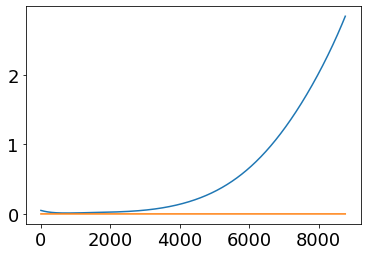

In [295]:
###########################
# now the model uncertainty
M_t_tasmax = .5*pd.DataFrame(preds_noIntercept_tasmax585).apply(np.var,axis = 0) + \
    .5*pd.DataFrame(preds_noIntercept_tasmax126).apply(np.var,axis = 0)
M_t_tasmax.plot()


M_t_pr = .5*pd.DataFrame(preds_noIntercept_pr585).apply(np.var,axis = 0) + \
    .5*pd.DataFrame(preds_noIntercept_pr126).apply(np.var,axis = 0)
M_t_pr.plot()


In [306]:
M_t_pr

0       2.943931e-12
1       2.935425e-12
2       2.926940e-12
3       2.918476e-12
4       2.910034e-12
            ...     
8760    3.441616e-10
8761    3.443080e-10
8762    3.444545e-10
8763    3.446010e-10
8764    3.447476e-10
Length: 8765, dtype: float64

In [296]:
###########################
# now the scenario uncertainty
S_t_tasmax = pd.DataFrame([preds_noIntercept_tasmax585.mean(axis = 0), \
                    preds_noIntercept_tasmax126.mean(axis = 0)]).apply(np.var,axis = 0)

S_t_tasmax


S_t_pr = pd.DataFrame([preds_noIntercept_pr585.mean(axis = 0), \
                    preds_noIntercept_pr126.mean(axis = 0)]).apply(np.var,axis = 0)

S_t_pr

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8760    0.0
8761    0.0
8762    0.0
8763    0.0
8764    0.0
Length: 8765, dtype: float64

In [287]:
x_tasmax = pd.DataFrame({'Scenario': S_t[366:], 'Model': M_t[366:], 'InternalVariability': internalVariability})
x_tasmax['total']               = x_tasmax.Scenario + x_tasmax.Model + x_tasmax.InternalVariability
x_tasmax['Scenario']            = x_tasmax.Scenario/x.total
x_tasmax['Model']               = x_tasmax.Model/x.total
x_tasmax['InternalVariability'] = x_tasmax.InternalVariability/x.total

x_tasmax['InternalVariability_frac'] = 1 - x_tasmax.InternalVariability

x_tasmax['date'] = list(pd.date_range(start="2017-01-01",end="2039-12-30"))

Text(0.5, 1.0, 'Sources of Uncertainty, Temperature (MIROC6 Ensemble)')

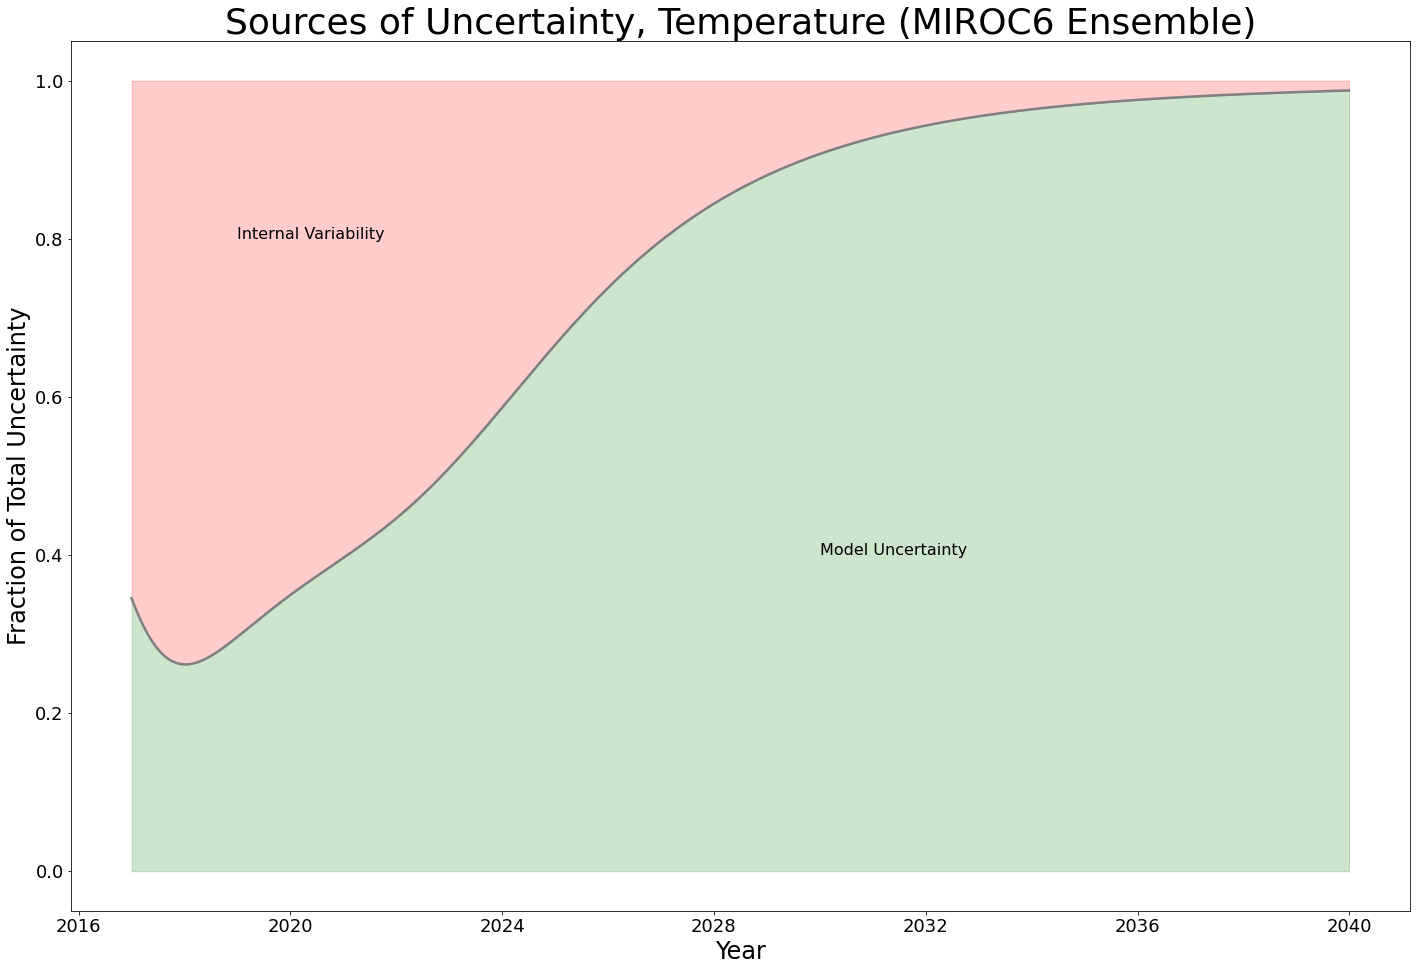

In [289]:
plt.figure(figsize = (24, 16))


times = x_tasmax.date.values

plt.plot(times, x_tasmax['InternalVariability_frac'], linewidth = 2.5, color = 'grey')


plt.fill_between(times, x_tasmax['InternalVariability_frac'], 1, color='red',   alpha=.2)
plt.fill_between(times, x_tasmax['InternalVariability_frac'], 0, color='green',  alpha=.2)


plt.xlabel('Year', fontsize = 24)
plt.ylabel('Fraction of Total Uncertainty', fontsize = 24)
plt.rcParams['font.size'] = 18


plt.text(datetime.datetime.strptime('2019-01-01','%Y-%m-%d'), .8, 'Internal Variability', fontsize=16)
plt.text(datetime.datetime.strptime('2030-01-01','%Y-%m-%d'), .4, 'Model Uncertainty',    fontsize=16)


plt.title("Sources of Uncertainty, Temperature (MIROC6 Ensemble)", 
          fontsize = 36)

In [313]:
x_pr

,Scenario,Model,InternalVariability,total,InternalVariability_frac,date
366,0.0,17.555841,34.972397,2.883213,-33.972397,2017-01-01
367,0.0,17.514509,34.998319,2.880232,-33.998319,2017-01-02
368,0.0,17.473244,35.024166,2.877261,-34.024166,2017-01-03
369,0.0,17.432044,35.049939,2.874301,-34.049939,2017-01-04
370,0.0,17.390910,35.075637,2.871350,-34.075637,2017-01-05
...,...,...,...,...,...,...
8760,0.0,119.825345,0.668337,346.081185,0.331663,2039-12-26
8761,0.0,119.824919,0.668050,346.227620,0.331950,2039-12-27
8762,0.0,119.824487,0.667764,346.374101,0.332236,2039-12-28
8763,0.0,119.824047,0.667478,346.520628,0.332522,2039-12-29


In [324]:
x_pr = pd.DataFrame({'Scenario': S_t_pr[366:], 'Model': M_t_pr[366:], 'InternalVariability': internalVariability_pr})
x_pr = x_pr*1e10

x_pr['total']               = x_pr.Scenario + x_pr.Model + x_pr.InternalVariability
x_pr['Scenario']            = x_pr.Scenario/x.total
x_pr['Model']               = x_pr.Model/x.total
x_pr['InternalVariability'] = x_pr.InternalVariability/x.total

x_pr['InternalVariability_frac'] = 1 - x_pr.InternalVariability

x_pr['date'] = list(pd.date_range(start="2017-01-01",end="2039-12-30"))


x_pr.head()


,Scenario,Model,InternalVariability,total,InternalVariability_frac,date
366,0.0,0.175558,0.349724,0.028832,0.650276,2017-01-01
367,0.0,0.175145,0.349983,0.028802,0.650017,2017-01-02
368,0.0,0.174732,0.350242,0.028773,0.649758,2017-01-03
369,0.0,0.174320,0.350499,0.028743,0.649501,2017-01-04
370,0.0,0.173909,0.350756,0.028714,0.649244,2017-01-05


Text(0.5, 1.0, 'Sources of Uncertainty, Precipitation (MIROC6 Ensemble)')

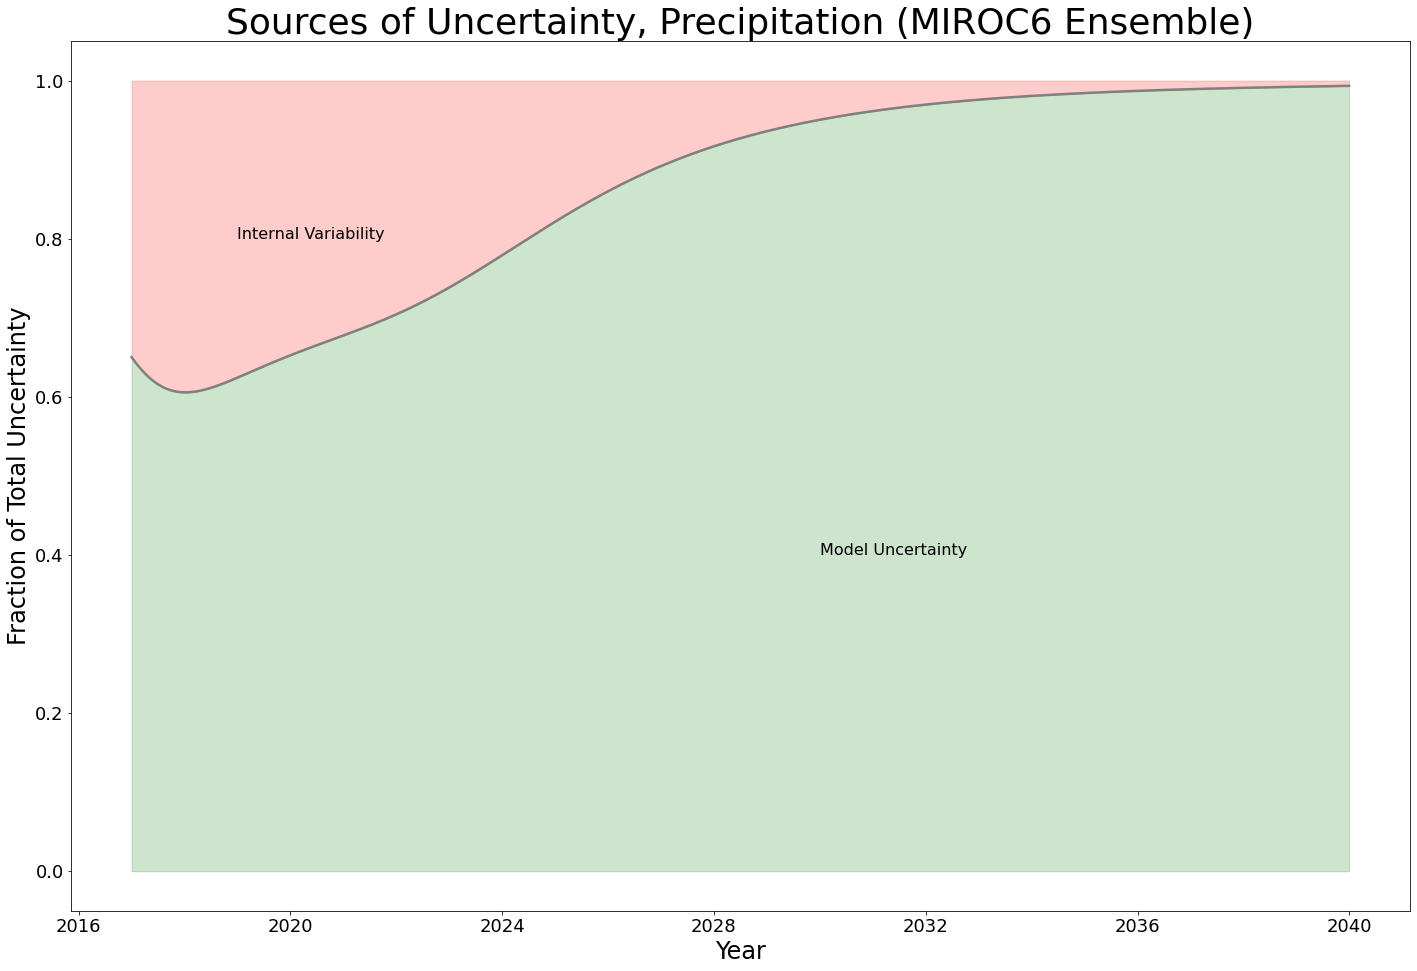

In [325]:
plt.figure(figsize = (24, 16))


times = x_pr.date.values

plt.plot(times, x_pr['InternalVariability_frac'], linewidth = 2.5, color = 'grey')


plt.fill_between(times, x_pr['InternalVariability_frac'], 1, color='red',   alpha=.2)
plt.fill_between(times, x_pr['InternalVariability_frac'], 0, color='green',  alpha=.2)


plt.xlabel('Year', fontsize = 24)
plt.ylabel('Fraction of Total Uncertainty', fontsize = 24)
plt.rcParams['font.size'] = 18


plt.text(datetime.datetime.strptime('2019-01-01','%Y-%m-%d'), .8, 'Internal Variability', fontsize=16)
plt.text(datetime.datetime.strptime('2030-01-01','%Y-%m-%d'), .4, 'Model Uncertainty',    fontsize=16)


plt.title("Sources of Uncertainty, Precipitation (MIROC6 Ensemble)", 
          fontsize = 36)

### Make the correlation maps
now get the prism data as well

In [51]:
tempEnsAvg     = tasmaxAll_585.mean(dim = ['ensemble']).sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2019-12-31'))
tempEnsAvg['tasmax'] = tempEnsAvg['tasmax'] - 273


In [42]:
prEnsAvg     = prAll_585.mean(dim = ['ensemble']).sel(lat=slice(min_lat,max_lat), 
                    lon=slice(min_lon,max_lon),
                   time=slice('2015-01-01','2019-12-31'))

In [82]:
start = time.time()

allQuarters_pr        = locDataByZips.apply(findClosest_pr, axis=1)

print(time.time() - start)

prPreds = locDataByZips.copy()

prPreds[list(pd.date_range(start="2015-01-01",end="2019-12-31").\
                   strftime('%Y%m%d'))] = pd.DataFrame(allQuarters_pr.tolist(), index=allQuarters_pr.index)


prPred_toMerge = pd.melt(prPreds, id_vars = ["zipcode","lat","lon"], 
        var_name   = 'date',
        value_name = 'predPr',
        value_vars =list(pd.date_range(start="2015-01-01",end="2019-12-31").strftime('%Y%m%d')))
prPred_toMerge['date'] = prPred_toMerge.date.astype('int64')


16.90057110786438


In [83]:
start = time.time()

allQuarters_temp        = locDataByZips.apply(findClosest_temp, axis=1)

print(time.time() - start)

tempPreds = locDataByZips.copy()

tempPreds[list(pd.date_range(start="2015-01-01",end="2019-12-31").\
                   strftime('%Y%m%d'))] = pd.DataFrame(allQuarters_temp.tolist(), index=allQuarters_temp.index)


tempPred_toMerge = pd.melt(tempPreds, id_vars = ["zipcode","lat","lon"], 
        var_name   = 'date',
        value_name = 'predTemp',
        value_vars =list(pd.date_range(start="2015-01-01",end="2019-12-31").strftime('%Y%m%d')))
tempPred_toMerge['date'] = tempPred_toMerge.date.astype('int64')


17.40021300315857


In [57]:
def getData(weatherType,yearRange1,yearRange2):

    if weatherType == "Tmax":
        weatherVar = "temperature"
    else: 
        weatherVar = "precipitation"
    
    year = yearRange1
    filename = "../../../../../../../Volumes/backup2/dissData/prism/zipcode" + weatherType + str(year) + ".csv"
    data = dd.read_csv(filename, assume_missing=True)[['ZIP','date',weatherVar]]
    data['ZIP'] = data.ZIP.astype('int64')

    
   
    years = range(yearRange1 + 1,yearRange2 + 1)
    for year in years:
        filename = "../../../../../../../Volumes/backup2/dissData/prism/zipcode" + weatherType + str(year) + ".csv"
        tempData = dd.read_csv(filename, assume_missing=True)[['ZIP','date',weatherVar]]
        tempData['ZIP'] = tempData.ZIP.astype('int64')

        # tempData = tempData[tempData.ZIP.isin(relevantZips)]
        # tempData = tempData[~(tempData[weatherVar].isna().compute())]
        data = data.append(tempData)

    data = data[~(data[weatherVar].isna())] # .compute()
    
    return(data)

In [58]:
tempData   = getData("Tmax", 2015, 2019)
temp       = tempData.compute(workers = 100)

precipData = getData("Precip", 2015, 2019)
precip     = precipData.compute(workers = 100)


In [63]:
precip['date'] = precip.date.astype('int64')
temp['date']   = temp.date.astype('int64')

In [85]:
allWeather = precip.merge(temp)
allWeather.rename(columns = {'ZIP': 'zipcode'}, inplace = True)
allWeather = allWeather.merge(prPred_toMerge, how = 'left').merge(tempPred_toMerge, how = 'left')

In [88]:
allWeather.head()

,zipcode,date,precipitation,temperature,lat,lon,predPr,predTemp
0,1001,20150101,0.0,-0.450,42.060642,-72.635331,0.000027,1.171936
1,1002,20150101,0.0,-2.794,42.369334,-72.514122,0.000027,1.171936
2,1003,20150101,0.0,-1.265,42.389488,-72.525643,0.000027,1.171936
3,1005,20150101,0.0,-3.425,42.410920,-72.108630,0.000027,1.979797
4,1007,20150101,0.0,-1.442,42.261586,-72.348087,0.000027,1.979797


In [90]:
corrByLatLon = allWeather.groupby(['zipcode','lat','lon'])[['precipitation','temperature','predPr','predTemp']].corr().reset_index()

In [95]:
corrByLatLon.head()

,zipcode,lat,lon,level_3,precipitation,temperature,predPr,predTemp
0,1001,42.060642,-72.635331,precipitation,1.000000,-0.001081,0.003588,0.013156
1,1001,42.060642,-72.635331,temperature,-0.001081,1.000000,0.307481,0.881413
2,1001,42.060642,-72.635331,predPr,0.003588,0.307481,1.000000,0.332541
3,1001,42.060642,-72.635331,predTemp,0.013156,0.881413,0.332541,1.000000
4,1002,42.369334,-72.514122,precipitation,1.000000,0.014336,0.014620,0.018887


In [96]:
tempCorr = corrByLatLon[corrByLatLon.level_3 == 'temperature'][['lat','lon','predTemp']]
tempCorr

,lat,lon,predTemp
1,42.060642,-72.635331,0.881413
5,42.369334,-72.514122,0.886788
9,42.389488,-72.525643,0.884860
13,42.410920,-72.108630,0.878893
17,42.261586,-72.348087,0.884217
...,...,...,...
81201,46.900053,-119.809076,0.916764
81205,46.042820,-118.659740,0.901995
81209,46.263010,-118.152305,0.891673
81213,46.064996,-118.338637,0.892947


Text(0.5, 1.0, 'Correlation between Actual and Predicted Daily Max Temperature, 2015-2019')

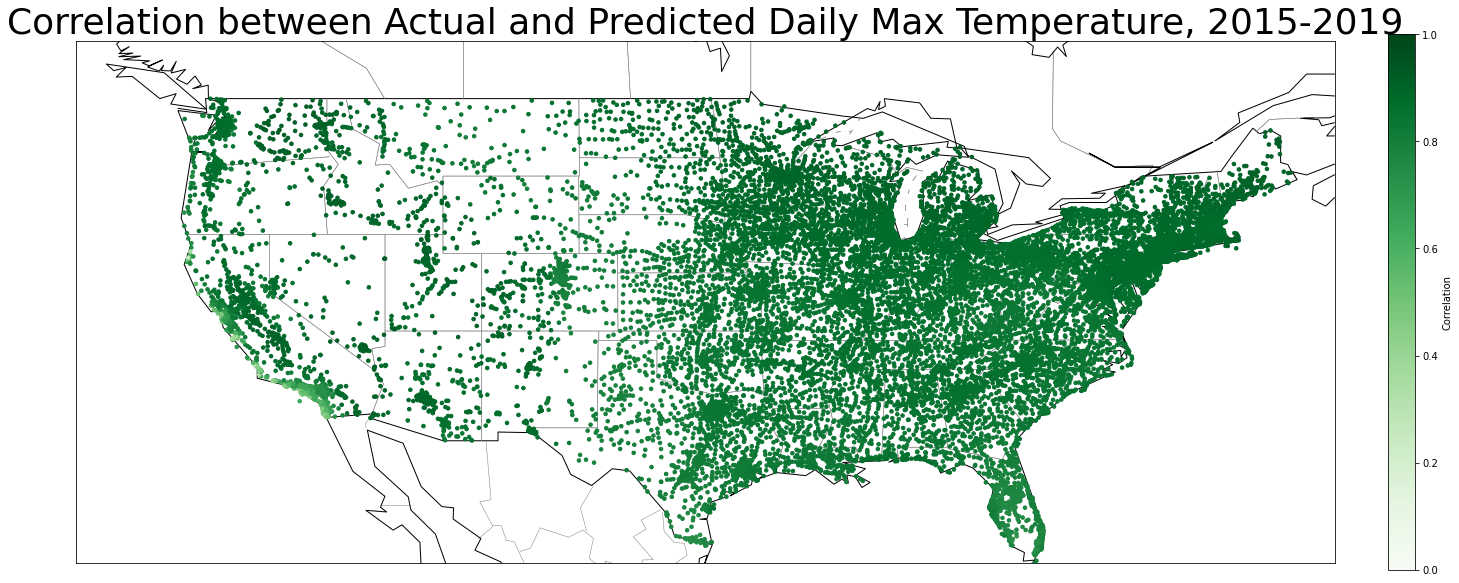

In [112]:
plt.figure(figsize = (24, 16))


lat = tempCorr.lat.values
lon = tempCorr.lon.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, s=50, linewidths=None, marker = ".", 
          c=tempCorr.predTemp,
          zorder=5,
          vmin = 0, 
          vmax = 1, cmap = 'Greens') # 
          # cmap="RdBu", edgecolor="k")
plt.colorbar(label="Correlation", fraction=0.02, pad=0.04)

plt.title("Correlation between Actual and Predicted Daily Max Temperature, 2015-2019", 
          fontsize = 36)

In [97]:
prCorr = corrByLatLon[corrByLatLon.level_3 == 'precipitation'][['lat','lon','predPr']]
prCorr

,lat,lon,predPr
0,42.060642,-72.635331,0.003588
4,42.369334,-72.514122,0.014620
8,42.389488,-72.525643,0.018164
12,42.410920,-72.108630,0.015329
16,42.261586,-72.348087,0.016279
...,...,...,...
81200,46.900053,-119.809076,0.172209
81204,46.042820,-118.659740,0.183059
81208,46.263010,-118.152305,0.199592
81212,46.064996,-118.338637,0.172908


Text(0.5, 1.0, 'Correlation between Actual and Predicted Precipitation, 2015-2019')

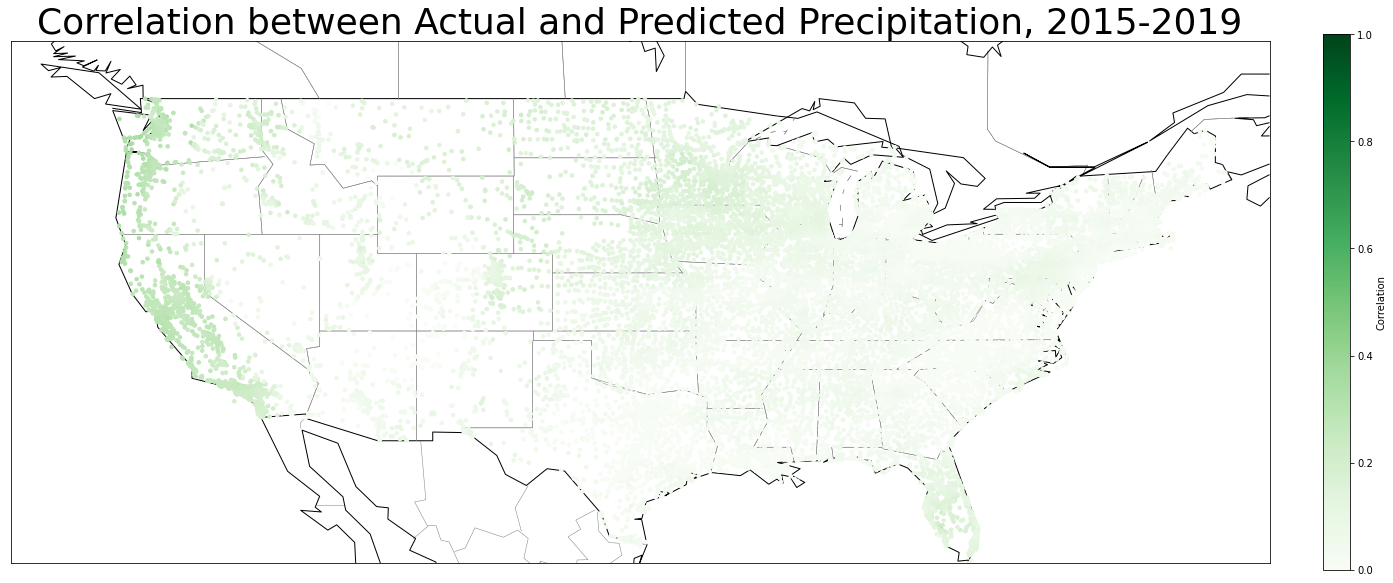

In [110]:
plt.figure(figsize = (24, 16))


lat = prCorr.lat.values
lon = prCorr.lon.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, s=50, linewidths=None, marker = ".", 
          c=prCorr.predPr,
          zorder=5,
          vmin = 0, 
          vmax = 1, cmap = 'Greens') # 
          # cmap="RdBu", edgecolor="k")
plt.colorbar(label="Correlation", fraction=0.02, pad=0.04)

plt.title("Correlation between Actual and Predicted Precipitation, 2015-2019", 
          fontsize = 36)

# Summaries
Summarize some of the data here.

### average weather by coords across ensemble and across time

In [327]:
prAll = getAllData('pr','ssp585').compute(workers = 100)
prAll

tasmaxAll = getAllData('tasmax','ssp585').compute(workers = 100)
tasmaxAll

extremes = pd.DataFrame()

extremes['pr_8099'] = pd.DataFrame(np.concatenate(prAll.sel(time=slice('1981-01-01','1999-12-31')).pr.values).ravel()).sample(frac = 0.01).iloc[:,0]
extremes['pr_2039'] = pd.DataFrame(np.concatenate(prAll.sel(time=slice('2020-01-01','2039-12-31')).pr.values).ravel()).sample(frac = 0.01).iloc[:,0]

extremes['tasmax_8099'] = pd.DataFrame(np.concatenate(tasmaxAll.sel(time=slice('1981-01-01','1999-12-31')).tasmax.values).ravel()).sample(frac = 0.01).iloc[:,0]
extremes['tasmax_2039'] = pd.DataFrame(np.concatenate(tasmaxAll.sel(time=slice('2020-01-01','2039-12-31')).tasmax.values).ravel()).sample(frac = 0.01).iloc[:,0]


extremes['tasmax_8099'] = 1.8*(extremes['tasmax_8099'] - 273) + 32
extremes['tasmax_2039'] = 1.8*(extremes['tasmax_2039'] - 273) + 32



../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/pr/pr_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/pr/pr_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  1.1920928955078125e-06
../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/tasmax/tasmax_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  5.0067901611328125e-06


Text(0.5, 0, 'Daily Max Temperature')

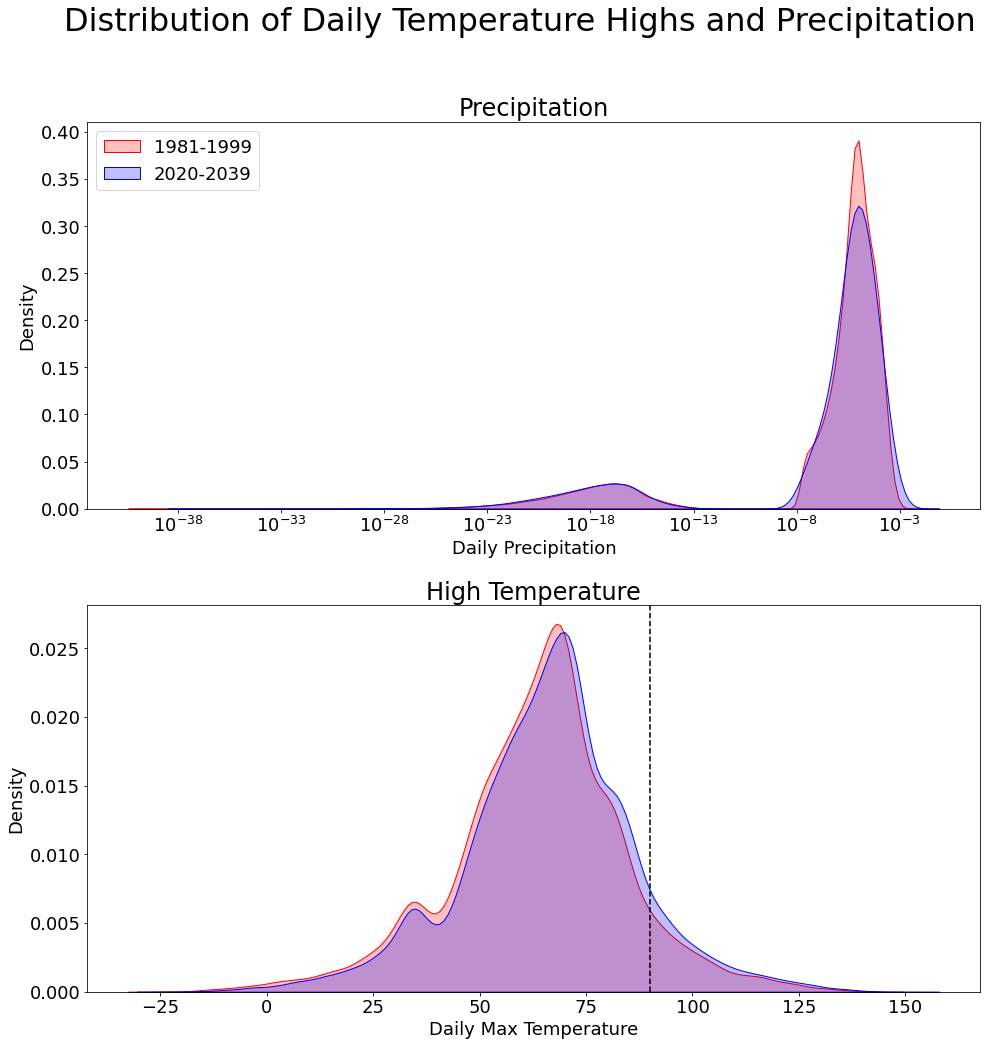

In [331]:
fig = plt.figure(figsize = (16, 16))
fig.subplots_adjust(hspace = 0.25)

fig.suptitle('Distribution of Daily Temperature Highs and Precipitation', fontsize = 32)

ax1 = fig.add_subplot(2,1,1) 
ax1 = sns.kdeplot(extremes['pr_8099'], shade=True, color="r",log_scale = True, label = '1981-1999')
ax1 = sns.kdeplot(extremes['pr_2039'], shade=True, color="b",log_scale = True, label = '2020-2039')
# ax1.axvline(x = winter.temperature.quantile(0.95), color ='black',linestyle = '--')# '--')
#ax1.set(xlim=(0, 0.0005))
ax1.set_title("Precipitation", fontsize = 24)
# ax1.set_xticks([])
# ax1.set_ylim(0, 0.1)
ax1.set_ylabel('Density')
ax1.set_xlabel('Daily Precipitation')
ax1.legend(fontsize = 24)
sns.move_legend(ax1, "upper left")

ax2 = fig.add_subplot(2,1,2) 
ax2 = sns.kdeplot(extremes['tasmax_8099'], shade=True, color="r")
ax2 = sns.kdeplot(extremes['tasmax_2039'], shade=True, color="b")
ax2.axvline(x = 90, color ='black',linestyle = '--')# '--')
ax2.set_title("High Temperature", fontsize = 24)
ax2.set_ylabel('Density')
ax2.set_xlabel('Daily Max Temperature')
# ax2.set_xlim(-10, 50)
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_ylim(0, 0.1)


In [236]:
tasmaxAll = getAllData('tasmax','ssp585').compute(workers = 100)
tasmaxAll

../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/tasmax/tasmax_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07


<xarray.Dataset>
Dimensions:    (bnds: 2, ensemble: 50, lat: 25, lon: 64, time: 21549)
Coordinates:
    height     float64 2.0
    lat_bnds   (lat, bnds) float64 21.01 22.41 22.41 23.81 ... 54.63 54.63 56.03
    lon_bnds   (lon, bnds) float64 201.8 203.2 203.2 204.6 ... 290.4 290.4 291.8
  * lat        (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33
  * lon        (lon) float64 -157.5 -156.1 -154.7 ... -71.72 -70.31 -68.91
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01 1981-01-02 ... 2040-01-01
  * time       (time) datetime64[ns] 1981-01-01T12:00:00 ... 2039-12-31T12:00:00
Dimensions without coordinates: bnds, ensemble
Data variables:
    tasmax     (ensemble, time, lat, lon) float32 298.45532 ... 259.1733

In [32]:
tasmaxAll = getAllData('tasmax','ssp585')
tasmaxAll['tasmax'] = 1.8*(tasmaxAll.tasmax - 273) + 32

start       = time.time()

overallTemp     = tasmaxAll.mean(dim = ['ensemble','lat','lon'])
overallMeanTemp = pd.Series(overallTemp.tasmax.values)
print(time.time() - start)


# find the standard deviation across all ensembles
overallStdTemp  = tasmaxAll.std(dim = ['ensemble','lat','lon'])
overallStdTemp  = pd.Series(tasmaxAll.mean(dim = ['lat',
                    'lon']).std(dim = ['ensemble']).tasmax.values)
print(time.time() - start)

rollingMean_ssp585  = overallMeanTemp.rolling(365).mean()
rollingUpper_ssp585 = overallMeanTemp.rolling(365).mean() + 1.96*overallStdTemp.rolling(365).mean()
rollingLower_ssp585 = overallMeanTemp.rolling(365).mean() - 1.96*overallStdTemp.rolling(365).mean()

../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/tasmax/tasmax_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07


In [41]:
tasmaxAll = getAllData('tasmax','ssp126')
tasmaxAll['tasmax'] = 1.8*(tasmaxAll.tasmax - 273) + 32

start       = time.time()

overallTemp     = tasmaxAll.mean(dim = ['ensemble','lat','lon'])
overallMeanTemp = pd.Series(overallTemp.tasmax.values)
print(time.time() - start)


# find the standard deviation across all ensembles
overallStdTemp  = tasmaxAll.std(dim = ['ensemble','lat','lon'])
overallStdTemp  = pd.Series(tasmaxAll.mean(dim = ['lat',
                    'lon']).std(dim = ['ensemble']).tasmax.values)
print(time.time() - start)

rollingMean_ssp126  = overallMeanTemp.rolling(365).mean()
rollingUpper_ssp126 = overallMeanTemp.rolling(365).mean() + 1.96*overallStdTemp.rolling(365).mean()
rollingLower_ssp126 = overallMeanTemp.rolling(365).mean() - 1.96*overallStdTemp.rolling(365).mean()

../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/tasmax/tasmax_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp126/tasmax/tasmax_day_MIROC6_ssp126_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07
33.95875573158264
38.23326373100281


Text(0.5, 1.0, 'Temperature Mean Trend')

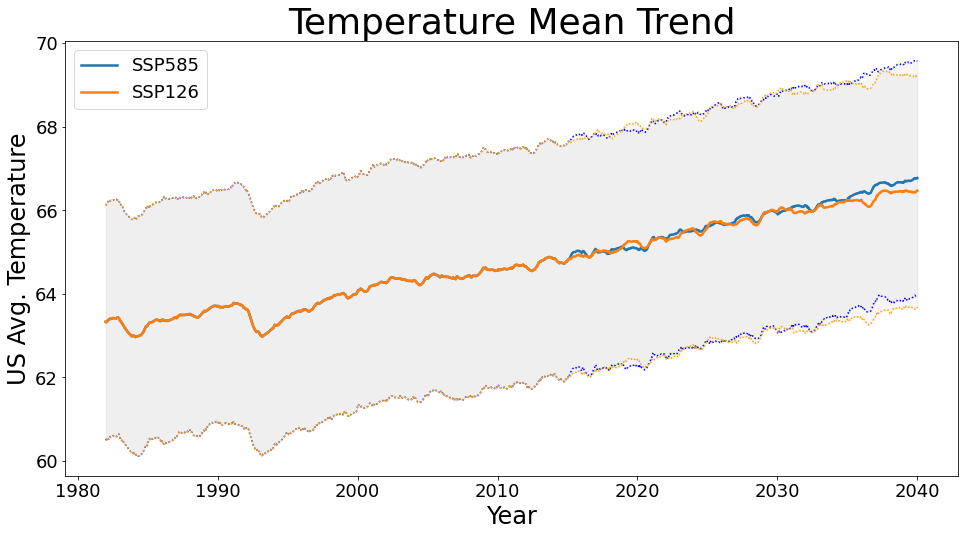

In [55]:
plt.figure(figsize = (16, 8))


times = tasmaxAll.time.values

plt.plot(times,rollingMean_ssp585,linewidth = 2.5, label = 'SSP585')
plt.plot(times,rollingUpper_ssp585, color = 'blue', linestyle = 'dotted')
plt.plot(times,rollingLower_ssp585, color = 'blue', linestyle = 'dotted')
plt.fill_between(times, rollingLower_ssp585, rollingUpper_ssp585, color='lightgrey', alpha=.2)


plt.plot(times,rollingMean_ssp126,linewidth = 2.5, label = 'SSP126')
plt.plot(times,rollingUpper_ssp126, color = 'orange', linestyle = 'dotted')
plt.plot(times,rollingLower_ssp126, color = 'orange', linestyle = 'dotted')
plt.fill_between(times, rollingLower_ssp126, rollingUpper_ssp126, color='lightgrey', alpha=.2)



plt.xlabel('Year', fontsize = 24)
plt.ylabel('US Avg. Temperature', fontsize = 24)
plt.rcParams['font.size'] = 18
plt.legend()

plt.title("Temperature Mean Trend", 
          fontsize = 36)

### precipitation next

In [57]:
import time as time
prAll           = getAllData('pr','ssp585')

start       = time.time()

overallPr     = prAll.mean(dim = ['ensemble','lat','lon'])
overallMeanPr = pd.Series(overallPr.pr.values)
print(time.time() - start)


# find the standard deviation across all ensembles
overallStdPr  = prAll.std(dim = ['ensemble','lat','lon'])
overallStdPr  = pd.Series(prAll.mean(dim = ['lat',
                    'lon']).std(dim = ['ensemble']).pr.values)
print(time.time() - start)

rollingMean_ssp585  = overallMeanPr.rolling(365).mean()
rollingUpper_ssp585 = overallMeanPr.rolling(365).mean() + 1.96*overallStdPr.rolling(365).mean()
rollingLower_ssp585 = overallMeanPr.rolling(365).mean() - 1.96*overallStdPr.rolling(365).mean()

../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/pr/pr_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp585/pr/pr_day_MIROC6_ssp585_r*i1p1f1_gn.nc
starting to load
ending the load:  0.0
84.63253784179688
87.84748792648315


In [58]:
import time as time
prAll           = getAllData('pr','ssp126')

start       = time.time()

overallPr     = prAll.mean(dim = ['ensemble','lat','lon'])
overallMeanPr = pd.Series(overallPr.pr.values)
print(time.time() - start)


# find the standard deviation across all ensembles
overallStdPr  = prAll.std(dim = ['ensemble','lat','lon'])
overallStdPr  = pd.Series(prAll.mean(dim = ['lat',
                    'lon']).std(dim = ['ensemble']).pr.values)
print(time.time() - start)

rollingMean_ssp126  = overallMeanPr.rolling(365).mean()
rollingUpper_ssp126 = overallMeanPr.rolling(365).mean() + 1.96*overallStdPr.rolling(365).mean()
rollingLower_ssp126  = overallMeanPr.rolling(365).mean() - 1.96*overallStdPr.rolling(365).mean()

../../../../../../../Volumes/backup2/dissData/cmip6Data/historical/pr/pr_day_MIROC6_historical_r*i1p1f1_gn.nc ../../../../../../../Volumes/backup2/dissData/cmip6Data/ssp126/pr/pr_day_MIROC6_ssp126_r*i1p1f1_gn.nc
starting to load
ending the load:  9.5367431640625e-07
48.68141531944275
51.89646315574646


Text(0.5, 1.0, 'Precipitation Mean Trend')

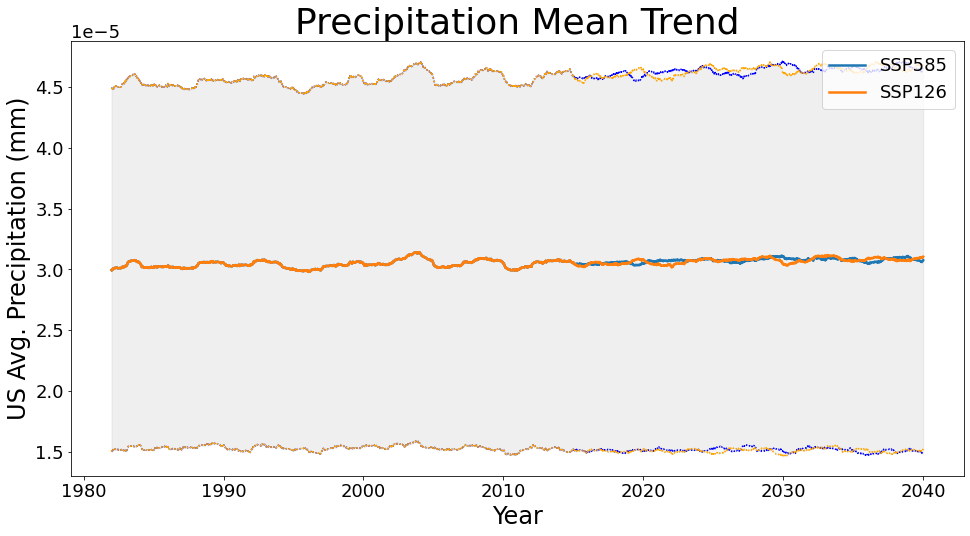

In [62]:
plt.figure(figsize = (16, 8))


times = prAll.time.values

plt.plot(times,rollingMean_ssp585,linewidth = 2.5, label = 'SSP585')
plt.plot(times,rollingUpper_ssp585, color = 'blue', linestyle = 'dotted')
plt.plot(times,rollingLower_ssp585, color = 'blue', linestyle = 'dotted')
plt.fill_between(time, rollingLower_ssp585, rollingUpper_ssp585, color='lightgrey', alpha=.2)


plt.plot(times,rollingMean_ssp126,linewidth = 2.5, label = 'SSP126')
plt.plot(times,rollingUpper_ssp126, color = 'orange', linestyle = 'dotted')
plt.plot(times,rollingLower_ssp126, color = 'orange', linestyle = 'dotted')
plt.fill_between(times, rollingLower_ssp126, rollingUpper_ssp126, color='lightgrey', alpha=.2)



plt.xlabel('Year', fontsize = 24)
plt.ylabel('US Avg. Precipitation (mm)', fontsize = 24)
plt.rcParams['font.size'] = 18
plt.legend()

plt.title("Precipitation Mean Trend", 
          fontsize = 36)

In [15]:
outfile =  '../../data/companyData/miroc_historicalMean.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(overallMean, pickle_file)
    
outfile =  '../../data/companyData/miroc_historicalStdDev.pkl'
with open(outfile, 'wb') as pickle_file:
    pkl.dump(overallStd, pickle_file)

In [ ]:
'''start       = time.time()


byCoord = data.mean(dim = ['ensemble','time'])
ensembleMeanByCoord = byCoord.pr.values

time.time() - start'''

# Find Extremes

## 95th percentile by ensemble
find percentile by quarter

In [12]:
import time as time
tasmaxHist = getHistData('tasmax')
prHist = getHistData('pr')

starting to load
ending the load:  53.35005283355713
starting to load
ending the load:  42.256011724472046


### precipitation first
historical precipitation - 95th percentile

In [13]:
start                         = time.time()
pr95s = prHist.pr.groupby(prHist.time.dt.quarter).quantile(0.95, dim = ('time'))
print(time.time() - start)
pr95s

21.598779916763306


<xarray.DataArray 'pr' (ensemble: 50, quarter: 4, lat: 25, lon: 64)>
array([[[[1.31641405e-04, 1.29563061e-04, 1.41702030e-04, ...,
          7.71693347e-05, 9.02451869e-05, 1.17158434e-04],
         [1.53154889e-04, 1.36542944e-04, 1.63721963e-04, ...,
          6.25144174e-05, 7.34195248e-05, 9.82391975e-05],
         [1.76013001e-04, 1.56153471e-04, 1.88045231e-04, ...,
          1.06384704e-04, 1.00254947e-04, 1.14234017e-04],
         ...,
         [1.37293169e-04, 1.35814769e-04, 1.26326129e-04, ...,
          7.51285956e-05, 8.21820748e-05, 9.68405755e-05],
         [1.45925458e-04, 1.41054976e-04, 1.34134756e-04, ...,
          6.84649225e-05, 7.72470990e-05, 8.64323662e-05],
         [1.54982315e-04, 1.54048181e-04, 1.46424538e-04, ...,
          6.22714986e-05, 7.16748273e-05, 8.41733585e-05]],

        [[5.03627227e-05, 5.72173223e-05, 6.14132878e-05, ...,
          2.04839584e-04, 2.13738059e-04, 2.08263827e-04],
         [5.26003074e-05, 5.29110395e-05, 4.31492328e-05, ...

and future. load it, subtract off 95th percentile each quarter, and count the number of instances > 95th percentile

In [14]:
prFuture = getFutureData('pr','ssp585')

starting to load
ending the load:  9.5367431640625e-07


In [15]:
def getFuture_95s(weather,scenario, quarter): 
    # get the past 95s
    pastData = getHistData(weather)
    past95s  = pastData[weather].groupby(pastData.time.dt.quarter).quantile(0.95, dim = ('time'))
    
    # use these to count occurrences
    futureData = getFutureData(weather,scenario)
    
    weatherExtremes = (1*(futureData.where(futureData.time.dt.quarter == quarter, drop = True)[weather] - 
     past95s.where(past95s.quarter == quarter, drop = True)) > 0)
    
    weatherAvg = weatherExtremes.groupby(weatherExtremes.time.dt.year).\
    sum(dim = ['time','quarter']).mean(dim = ['year','ensemble']).compute(workers = 100)
        
    return(weatherAvg)

# def getFutureData(weather,scenario):



In [16]:
print('ssp585 - pr')
prQ1_ssp585_95s = getFuture_95s('pr','ssp585',1)
prQ2_ssp585_95s = getFuture_95s('pr','ssp585',2)
prQ3_ssp585_95s = getFuture_95s('pr','ssp585',3)
prQ4_ssp585_95s = getFuture_95s('pr','ssp585',4)

print('ssp126 - pr')
prQ1_ssp126_95s = getFuture_95s('pr','ssp126',1)
prQ2_ssp126_95s = getFuture_95s('pr','ssp126',2)
prQ3_ssp126_95s = getFuture_95s('pr','ssp126',3)
prQ4_ssp126_95s = getFuture_95s('pr','ssp126',4)

ssp585 - pr
starting to load
ending the load:  2.4203388690948486
starting to load
ending the load:  1.1920928955078125e-06
starting to load
ending the load:  10.140609979629517
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  2.7357330322265625
starting to load
ending the load:  1.1920928955078125e-06
starting to load
ending the load:  2.500560760498047
starting to load
ending the load:  9.5367431640625e-07
ssp126 - pr
starting to load
ending the load:  3.7286341190338135
starting to load
ending the load:  2.1457672119140625e-06
starting to load
ending the load:  19.100821018218994
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  46.810003995895386
starting to load
ending the load:  1.1920928955078125e-06
starting to load
ending the load:  19.93308687210083
starting to load
ending the load:  9.5367431640625e-07


In [17]:
print('ssp585 - tasmax')
tasmaxQ1_ssp585_95s = getFuture_95s('tasmax','ssp585',1)
tasmaxQ2_ssp585_95s = getFuture_95s('tasmax','ssp585',2)
tasmaxQ3_ssp585_95s = getFuture_95s('tasmax','ssp585',3)
tasmaxQ4_ssp585_95s = getFuture_95s('tasmax','ssp585',4)

print('ssp126 - tasmax')
tasmaxQ1_ssp126_95s = getFuture_95s('tasmax','ssp126',1)
tasmaxQ2_ssp126_95s = getFuture_95s('tasmax','ssp126',2)
tasmaxQ3_ssp126_95s = getFuture_95s('tasmax','ssp126',3)
tasmaxQ4_ssp126_95s = getFuture_95s('tasmax','ssp126',4)

ssp585 - tasmax
starting to load
ending the load:  46.117615699768066
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  20.035979986190796
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  19.127557039260864
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  22.177016019821167
starting to load
ending the load:  0.0
ssp126 - tasmax
starting to load
ending the load:  17.32774019241333
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  16.70890712738037
starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  22.630752086639404
starting to load
ending the load:  1.1920928955078125e-06
starting to load
ending the load:  18.95820379257202
starting to load
ending the load:  0.0


### temperature next - 90F

In [19]:
tasmaxHist

<xarray.Dataset>
Dimensions:    (bnds: 2, ensemble: 50, lat: 25, lon: 64, time: 6939)
Coordinates:
    lat_bnds   (lat, bnds) float64 21.01 22.41 22.41 23.81 ... 54.63 54.63 56.03
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01 1981-01-02 ... 2000-01-01
    lon_bnds   (lon, bnds) float64 201.8 203.2 203.2 204.6 ... 290.4 290.4 291.8
    height     float64 2.0
  * time       (time) datetime64[ns] 1981-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lon        (lon) float64 -157.5 -156.1 -154.7 ... -71.72 -70.31 -68.91
  * lat        (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33
Dimensions without coordinates: bnds, ensemble
Data variables:
    tasmax     (ensemble, time, lat, lon) float32 298.45532 ... 263.53885
Attributes:
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   98616.0
    cmor_version:            3.4.0
    creation_date:      

In [21]:
quarter = 1

tasmaxHist['tasmax_F'] = 1.8*(tasmaxHist['tasmax']-273) + 32
tasmaxHist['extreme']  = 1*(tasmaxHist.tasmax_F > 90)


tasmaxHist_here = tasmaxHist.where(tasmaxHist.time.dt.quarter == quarter, drop = True).extreme
tasmaxHist_90s  = tasmaxHist_here.groupby(tasmaxHist_here.time.dt.year).\
    sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100)

tasmaxHist_90s

<xarray.DataArray 'extreme' (lat: 25, lon: 64)>
array([[1.18210526, 0.00736842, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 -157.5 -156.1 -154.7 -153.3 ... -71.72 -70.31 -68.91
  * lat      (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33

In [22]:
scenario = 'ssp585'
quarter  = 1

tasmaxFuture = getFutureData('tasmax',scenario)
tasmaxFuture['tasmax_F'] = 1.8*(tasmaxFuture['tasmax']-273) + 32
tasmaxFuture['extreme']  = 1*(tasmaxFuture.tasmax_F > 90)


tasmaxFuture = tasmaxFuture.where(tasmaxFuture.time.dt.quarter == quarter, drop = True).extreme

test = tasmaxFuture.groupby(tasmaxFuture.time.dt.year).\
    sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100)

tasmaxFuture_90s = tasmaxFuture.groupby(tasmaxFuture.time.dt.year).\
    sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100) - tasmaxHist_90s

starting to load
ending the load:  0.0


In [23]:
test.mean()

<xarray.DataArray 'extreme' ()>
array(1.21170714)
Coordinates:
    height   float64 2.0

In [24]:
tasmaxFuture_90s.mean()

<xarray.DataArray 'extreme' ()>
array(0.39269727)
Coordinates:
    height   float64 2.0

In [25]:
def getFuture_90F(scenario, quarter): 
    # get the past 95s 
    tasmaxHist_here = tasmaxHist.where(tasmaxHist.time.dt.quarter == quarter, drop = True).extreme
    tasmaxHist_90s  = tasmaxHist_here.groupby(tasmaxHist_here.time.dt.year).\
        sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100)
    
    
    
    # use these to count occurrences
    tasmaxFuture = getFutureData('tasmax',scenario)
    tasmaxFuture['tasmax_F'] = 1.8*(tasmaxFuture['tasmax']-273) + 32
    tasmaxFuture['extreme']  = 1*(tasmaxFuture.tasmax_F > 90)


    tasmaxFuture = tasmaxFuture.where(tasmaxFuture.time.dt.quarter == quarter, drop = True).extreme
    tasmaxFuture_90s = tasmaxFuture.groupby(tasmaxFuture.time.dt.year).\
        sum(dim = ['time']).mean(dim = ['year','ensemble']).compute(workers = 100) - tasmaxHist_90s
        
    return(tasmaxFuture_90s)

# def getFutureData(weather,scenario):



In [26]:
tasmaxHist = getHistData('tasmax')
tasmaxHist['tasmax_F'] = 1.8*(tasmaxHist['tasmax']-273) + 32
tasmaxHist['extreme']  = 1*(tasmaxHist['tasmax_F'] > 90)

starting to load
ending the load:  43.12268590927124


In [29]:
'''tasmaxHist = getHistData('tasmax')
tasmaxHist['tasmax_F'] = 1.8*(tasmaxHist['tasmax']-273) + 32
tasmaxHist['extreme']  = 1*(tasmaxHist['tasmax_F'] > 90)



print('ssp585 - tasmax')
tasmaxQ1_ssp585_90F = getFuture_90F('ssp585',1)
tasmaxQ2_ssp585_90F = getFuture_90F('ssp585',2)
tasmaxQ3_ssp585_90F = getFuture_90F('ssp585',3)
tasmaxQ4_ssp585_90F = getFuture_90F('ssp585',4)



print('ssp126 - tasmax')
tasmaxQ1_ssp126_90F = getFuture_90F('ssp126',1)'''
tasmaxQ2_ssp126_90F = getFuture_90F('ssp126',2)
tasmaxQ3_ssp126_90F = getFuture_90F('ssp126',3)
tasmaxQ4_ssp126_90F = getFuture_90F('ssp126',4)

starting to load
ending the load:  9.5367431640625e-07
starting to load
ending the load:  7.152557373046875e-07
starting to load
ending the load:  1.9073486328125e-06


In [30]:
print(np.mean(tasmaxQ1_ssp585_90F))
print(np.mean(tasmaxQ2_ssp585_90F))
print(np.mean(tasmaxQ3_ssp585_90F))
print(np.mean(tasmaxQ4_ssp585_90F))

<xarray.DataArray 'extreme' ()>
array(0.39269727)
Coordinates:
    height   float64 2.0
<xarray.DataArray 'extreme' ()>
array(2.37408462)
Coordinates:
    height   float64 2.0
<xarray.DataArray 'extreme' ()>
array(3.42591388)
Coordinates:
    height   float64 2.0
<xarray.DataArray 'extreme' ()>
array(0.6445865)
Coordinates:
    height   float64 2.0


## Merge Everything In
Currently we have the hqs in hqtest

In [ ]:
print('ssp585 - pr')
prQ1_ssp585_95s = getFuture_95s('pr','ssp585',1)
prQ2_ssp585_95s = getFuture_95s('pr','ssp585',2)
prQ3_ssp585_95s = getFuture_95s('pr','ssp585',3)
prQ4_ssp585_95s = getFuture_95s('pr','ssp585',4)

print('ssp126 - pr')
prQ1_ssp126_95s = getFuture_95s('pr','ssp126',1)
prQ2_ssp126_95s = getFuture_95s('pr','ssp126',2)
prQ3_ssp126_95s = getFuture_95s('pr','ssp126',3)
prQ4_ssp126_95s = getFuture_95s('pr','ssp126',4)

print('ssp585 - tasmax')
tasmaxQ1_ssp585_95s = getFuture_95s('tasmax','ssp585',1)
tasmaxQ2_ssp585_95s = getFuture_95s('tasmax','ssp585',2)
tasmaxQ3_ssp585_95s = getFuture_95s('tasmax','ssp585',3)
tasmaxQ4_ssp585_95s = getFuture_95s('tasmax','ssp585',4)

print('ssp126 - tasmax')
tasmaxQ1_ssp126_95s = getFuture_95s('tasmax','ssp126',1)
tasmaxQ2_ssp126_95s = getFuture_95s('tasmax','ssp126',2)
tasmaxQ3_ssp126_95s = getFuture_95s('tasmax','ssp126',3)
tasmaxQ4_ssp126_95s = getFuture_95s('tasmax','ssp126',4)



tasmaxQ1_ssp585_90F = getFuture_90F('ssp585',1)
tasmaxQ2_ssp585_90F = getFuture_90F('ssp585',2)
tasmaxQ3_ssp585_90F = getFuture_90F('ssp585',3)
tasmaxQ4_ssp585_90F = getFuture_90F('ssp585',4)

print('ssp126 - tasmax')
tasmaxQ1_ssp126_90F = getFuture_90F('ssp126',1)
tasmaxQ2_ssp126_90F = getFuture_90F('ssp126',2)
tasmaxQ3_ssp126_90F = getFuture_90F('ssp126',3)
tasmaxQ4_ssp126_90F = getFuture_90F('ssp126',4)

In [32]:
np.mean(tasmaxQ3_ssp585_90F)

<xarray.DataArray 'extreme' ()>
array(3.42591388)
Coordinates:
    height   float64 2.0

In [33]:
def findClosest(row):
    ################
    # pr scenarios
    closestVal_pr1_ssp585 = prQ1_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr2_ssp585 = prQ2_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr3_ssp585 = prQ3_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr4_ssp585 = prQ4_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    
    closestVal_pr1_ssp126 = prQ1_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr2_ssp126 = prQ2_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr3_ssp126 = prQ3_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_pr4_ssp126 = prQ4_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    
    
    ################
    # tasmax scenarios
    closestVal_tasmax1_ssp585_95s = tasmaxQ1_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax2_ssp585_95s = tasmaxQ2_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax3_ssp585_95s = tasmaxQ3_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax4_ssp585_95s = tasmaxQ4_ssp585_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    
    closestVal_tasmax1_ssp126_95s = tasmaxQ1_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax2_ssp126_95s = tasmaxQ2_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax3_ssp126_95s = tasmaxQ3_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax4_ssp126_95s = tasmaxQ4_ssp126_95s.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    
    
    # absolutes
    closestVal_tasmax1_ssp585_90F = tasmaxQ1_ssp585_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax2_ssp585_90F = tasmaxQ2_ssp585_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax3_ssp585_90F = tasmaxQ3_ssp585_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax4_ssp585_90F = tasmaxQ4_ssp585_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    
    closestVal_tasmax1_ssp126_90F = tasmaxQ1_ssp126_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax2_ssp126_90F = tasmaxQ2_ssp126_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax3_ssp126_90F = tasmaxQ3_ssp126_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values
    closestVal_tasmax4_ssp126_90F = tasmaxQ4_ssp126_90F.sel(lat=row.lat, lon=row.lon, method = 'nearest').values


    
    return(closestVal_pr1_ssp585.item(), closestVal_pr2_ssp585.item(), closestVal_pr3_ssp585.item(), closestVal_pr4_ssp585.item(),
           closestVal_pr1_ssp126.item(), closestVal_pr2_ssp126.item(), closestVal_pr3_ssp126.item(), closestVal_pr4_ssp126.item(),
           closestVal_tasmax1_ssp585_95s.item(), closestVal_tasmax2_ssp585_95s.item(), closestVal_tasmax3_ssp585_95s.item(), closestVal_tasmax4_ssp585_95s.item(),
           closestVal_tasmax1_ssp126_95s.item(), closestVal_tasmax2_ssp126_95s.item(), closestVal_tasmax3_ssp126_95s.item(), closestVal_tasmax4_ssp126_95s.item(),
           closestVal_tasmax1_ssp585_90F.item(), closestVal_tasmax2_ssp585_90F.item(), closestVal_tasmax3_ssp585_90F.item(), closestVal_tasmax4_ssp585_90F.item(),
           closestVal_tasmax1_ssp126_90F.item(), closestVal_tasmax2_ssp126_90F.item(), closestVal_tasmax3_ssp126_90F.item(), closestVal_tasmax4_ssp126_90F.item())


In [274]:
locData_withFracs = pd.read_csv('../../data/companyData/fractionEmployees_byEstablishment.csv')
'''[['zipcode','latitude','longitude']].drop_duplicates().rename(columns = {'lon': 'longitude',
                                                                            'lat': 'latitude'})'''
# find the last year for everything
'''idx = locData_withFracs.groupby(['parent_number'])['archive_version_year'].transform(max) == locData_withFracs['archive_version_year']

locData_withFracs = locData_withFracs[idx]

locData = locData_withFracs[['zipcode','latitude','longitude']].drop_duplicates().\
    rename(columns = {'lon': 'longitude', 'lat': 'latitude'})


locData['zipcode'] = locData['zipcode'].astype('int64')

locData.rename(columns = {'latitude': 'lat',
                         'longitude': 'lon'}, 
              inplace = True)


locDataByZips = locData.groupby('zipcode').mean().reset_index()
'''
# item = findClosest(hqTest.iloc[0,:],prQ4Avg)

"idx = locData_withFracs.groupby(['parent_number'])['archive_version_year'].transform(max) == locData_withFracs['archive_version_year']\n\nlocData_withFracs = locData_withFracs[idx]\n\nlocData = locData_withFracs[['zipcode','latitude','longitude']].drop_duplicates().    rename(columns = {'lon': 'longitude', 'lat': 'latitude'})\n\n\nlocData['zipcode'] = locData['zipcode'].astype('int64')\n\nlocData.rename(columns = {'latitude': 'lat',\n                         'longitude': 'lon'}, \n              inplace = True)\n\n\nlocDataByZips = locData.groupby('zipcode').mean().reset_index()\n"

In [279]:
sum(locData_withFracs.parent_number.isin(goodsData.gvkey))

73

In [275]:
locData_withFracs.head()

,archive_version_year,parent_number,latitude,longitude,zipcode,locationFracOfEmployees
0,2003.0,23077,40.44099,-80.00218,15222.0,0.147059
1,2003.0,23077,40.47235,-80.06152,15136.0,0.735294
2,2003.0,76547,26.55504,-81.88423,33907.0,0.121951
3,2003.0,76547,32.83435,-96.89570,75062.0,0.104530
4,2003.0,76547,32.90299,-117.11389,92131.0,0.104530


In [276]:
locDataByZips

,zipcode,lat,lon
0,603,18.447890,-67.146870
1,604,18.428352,-67.155030
2,605,18.445100,-67.141300
3,612,18.460900,-66.720700
4,613,18.458000,-66.737500
...,...,...,...
20129,99833,56.809900,-132.943100
20130,99835,57.054816,-135.344691
20131,99840,59.459380,-135.307800
20132,99901,55.354022,-131.675268


In [243]:
locDataByZips.drop_duplicates().shape

(20134, 3)

In [244]:
# closestVal_pr1_ssp585.item(), closestVal_pr2_ssp585.item(), closestVal_pr3_ssp585.item(), closestVal_pr4_ssp585.item(),
# closestVal_pr1_ssp126.item(), closestVal_pr2_ssp126.item(), closestVal_pr3_ssp126.item(), closestVal_pr4_ssp126.item(),
closestVal_tasmax1_ssp585_95s.item(), closestVal_tasmax2_ssp585_95s.item(), closestVal_tasmax3_ssp585_95s.item(), closestVal_tasmax4_ssp585_95s.item(),
closestVal_tasmax1_ssp126_95s.item(), closestVal_tasmax2_ssp126_95s.item(), closestVal_tasmax3_ssp126_95s.item(), closestVal_tasmax4_ssp126_95s.item(),
closestVal_tasmax1_ssp585_90F.item(), closestVal_tasmax2_ssp585_90F.item(), closestVal_tasmax3_ssp585_90F.item(), closestVal_tasmax4_ssp585_90F.item(),
closestVal_tasmax1_ssp126_90F.item(), closestVal_tasmax2_ssp126_90F.item(), closestVal_tasmax3_ssp126_90F.item(), closestVal_tasmax4_ssp126_90F.item())


SyntaxError: invalid syntax (<ipython-input-244-6e3cd6229da8>, line 6)

In [ ]:
start = time.time()

allQuarters        = locDataByZips.apply(findClosest, axis=1)


print(time.time() - start)

locDataByZips[['pr_q1_ssp585', 'pr_q2_ssp585', 'pr_q3_ssp585', 'pr_q4_ssp585',
               'pr_q1_ssp126', 'pr_q2_ssp126', 'pr_q3_ssp126', 'pr_q4_ssp126',
               'tasmax95s_q1_ssp585', 'tasmax95s_q2_ssp585', 'tasmax95s_q3_ssp585', 'tasmax95s_q4_ssp585',
               'tasmax95s_q1_ssp126', 'tasmax95s_q2_ssp126', 'tasmax95s_q3_ssp126', 'tasmax95s_q4_ssp126',
               'tasmax90F_q1_ssp585', 'tasmax90F_q2_ssp585', 'tasmax90F_q3_ssp585', 'tasmax90F_q4_ssp585',
               'tasmax90F_q1_ssp126', 'tasmax90F_q2_ssp126', 'tasmax90F_q3_ssp126', 'tasmax90F_q4_ssp126']] = pd.DataFrame(allQuarters.tolist(), index=allQuarters.index)


In [246]:
locDataByZips.head()

,zipcode,lat,lon
0,603,18.447890,-67.14687
1,604,18.428352,-67.15503
2,605,18.445100,-67.14130
3,612,18.460900,-66.72070
4,613,18.458000,-66.73750


In [40]:
preds = pd.melt(locDataByZips, 
        id_vars = ['zipcode','lat','lon'],
        value_vars = locDataByZips.columns[3:],
       value_name = 'extremePred')

preds[['variable','quarter','scenario']] = preds.variable.str.split('_',expand=True)

newPreds = preds.pivot(index=['zipcode','lat','lon', 'quarter','scenario'], columns='variable', values='extremePred').reset_index().\
    rename(columns = {'pr': 'prChange',
                     'tasmax95s': 'tasmax95sChange',
                     'tasmax90F': 'tasmax90FChange'})

newPreds['prChange']        = newPreds['prChange'] - 4.5
newPreds['tasmax95sChange'] = newPreds['tasmax95sChange'] - 4.5

newPreds.head()

variable,zipcode,lat,lon,quarter,scenario,prChange,tasmax90FChange,tasmax95sChange
0,603,18.447322,-67.147094,q1,ssp126,0.026667,0.0,12.514286
1,603,18.447322,-67.147094,q1,ssp585,0.167619,0.0,14.231429
2,603,18.447322,-67.147094,q2,ssp126,0.509524,0.0,17.993333
3,603,18.447322,-67.147094,q2,ssp585,0.801905,0.0,19.654286
4,603,18.447322,-67.147094,q3,ssp126,-0.481905,0.0,28.255238


In [248]:
preds.head()

,zipcode,lat,lon,variable,extremePred,quarter,scenario
0,603,18.447322,-67.147094,pr,4.667619,q1,ssp585
1,604,18.428352,-67.155030,pr,4.667619,q1,ssp585
2,605,18.445089,-67.141313,pr,4.667619,q1,ssp585
3,612,18.442130,-66.738624,pr,4.667619,q1,ssp585
4,613,18.457977,-66.737485,pr,4.667619,q1,ssp585


In [249]:
newPreds.groupby(['scenario','quarter']).tasmax90FChange.mean()

scenario  quarter
ssp126    q1         0.314615
          q2         6.034591
          q3         8.166092
          q4         1.297959
ssp585    q1         0.299489
          q2         6.051687
          q3         8.453014
          q4         1.268590
Name: tasmax90FChange, dtype: float64

In [43]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [273]:
locData_withFracs.parent_number

54            435388
80            479535
133           595777
134           595777
151           602789
             ...    
1557402    998608293
1557404    998622526
1557407    998861629
1557408    998862486
1557412    998913610
Name: parent_number, Length: 255914, dtype: object

In [251]:
locDataWithWeather = locData_withFracs.merge(newPreds[newPreds.scenario == 'ssp585'][['zipcode','quarter','prChange','tasmax90FChange']])

print(locDataWithWeather.shape)

locDataWithWeather.head()

(1023656, 9)


,archive_version_year,parent_number,latitude,longitude,zipcode,locationFracOfEmployees,quarter,prChange,tasmax90FChange
0,2003.0,435388,44.92883,-93.12358,55102.0,1.0,q1,0.553333,0.000000
1,2003.0,435388,44.92883,-93.12358,55102.0,1.0,q2,0.413333,5.954185
2,2003.0,435388,44.92883,-93.12358,55102.0,1.0,q3,0.064762,10.653484
3,2003.0,435388,44.92883,-93.12358,55102.0,1.0,q4,0.260952,0.000000
4,2003.0,6958797,44.91445,-93.14212,55102.0,1.0,q1,0.553333,0.000000


In [252]:
locDataWithWeather = locDataWithWeather.drop(columns = {'archive_version_year'}).drop_duplicates()

In [253]:
locDataWithWeather.shape

(1023656, 8)

In [254]:
locDataWithWeather.tasmax90FChange.describe()

count    1.023656e+06
mean     3.824677e+00
std      4.331276e+00
min     -1.052632e-03
25%      9.523810e-04
50%      1.678145e+00
75%      7.275689e+00
max      2.448331e+01
Name: tasmax90FChange, dtype: float64

In [255]:
locDataWithWeather.prChange.describe()

count    1.023656e+06
mean     2.908013e-01
std      3.721971e-01
min     -1.060000e+00
25%      4.857143e-02
50%      2.904762e-01
75%      5.276190e-01
max      2.081905e+00
Name: prChange, dtype: float64

In [224]:
locDataWithWeather = locDataWithWeather[locDataWithWeather.parent_number != '/']

In [257]:
sum(locDataWithWeather.parent_number.isin(goodsData.gvkey))

4

In [226]:
locDataWithWeather.parent_number.astype('int64')

0             435388
1             435388
2             435388
3             435388
4            6958797
             ...    
1023651    984973222
1023652    965633803
1023653    965633803
1023654    965633803
1023655    965633803
Name: parent_number, Length: 1023652, dtype: int64

In [227]:
locDataWithWeather.to_csv("../../data/companyData/locDataWithWeatherPreds.csv")
locDataWithWeather.head()

,parent_number,latitude,longitude,zipcode,locationFracOfEmployees,quarter,prChange,tasmax90FChange
0,435388,44.92883,-93.12358,55102.0,1.0,q1,0.553333,0.000000
1,435388,44.92883,-93.12358,55102.0,1.0,q2,0.413333,5.954185
2,435388,44.92883,-93.12358,55102.0,1.0,q3,0.064762,10.653484
3,435388,44.92883,-93.12358,55102.0,1.0,q4,0.260952,0.000000
4,6958797,44.91445,-93.14212,55102.0,1.0,q1,0.553333,0.000000


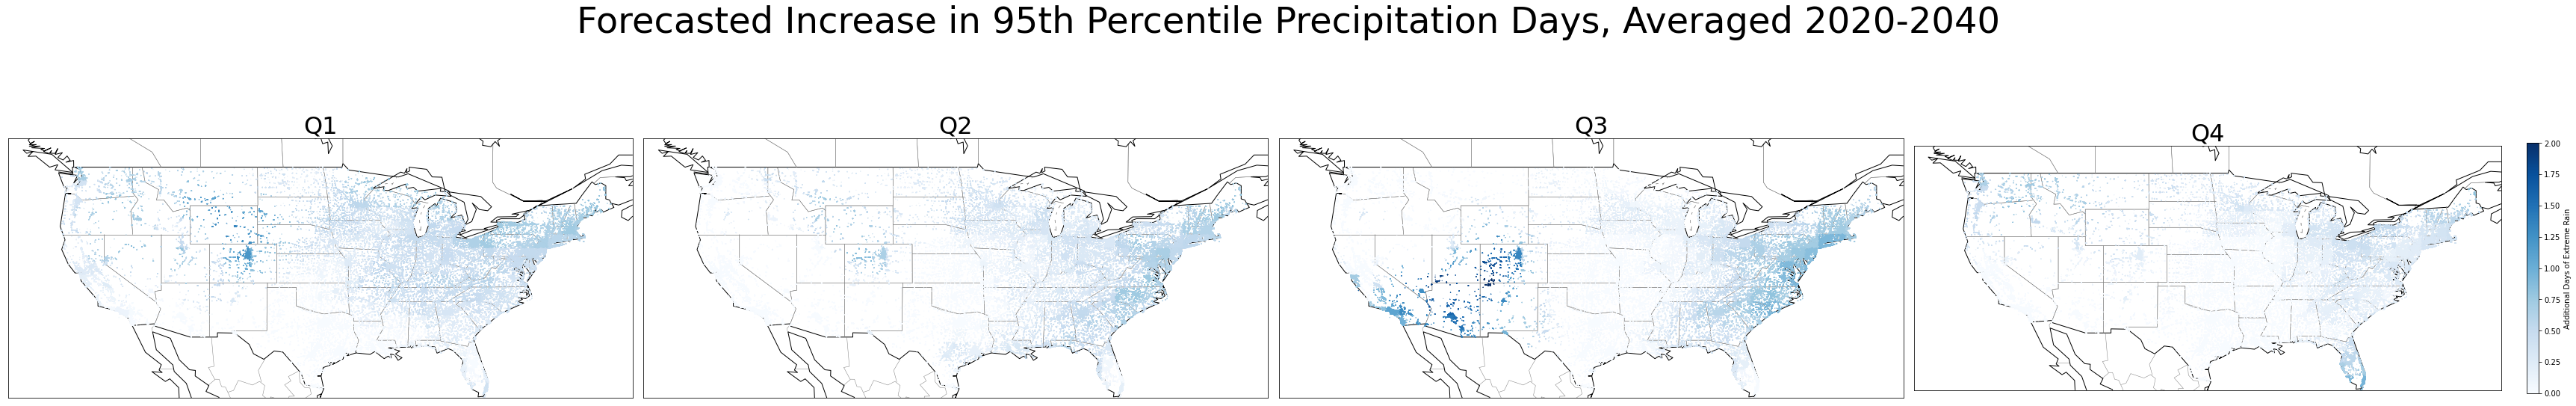

In [222]:
fig = plt.figure(figsize = (48, 32))
vmin = 0
vmax = 2



######################
# q1
ax = fig.add_subplot(141)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q1']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.prChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Blues',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees) # 
          # cmap="RdBu",)
plt.title("Q1", fontsize = 32)


######################
# q2
ax = fig.add_subplot(142)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q2']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.prChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Blues',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q2", fontsize = 32)


######################
# q3
ax = fig.add_subplot(143)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q3']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.prChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Blues',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q3", fontsize = 32)


######################
# q4
ax = fig.add_subplot(144)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q4']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.prChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Blues',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q4", fontsize = 32)
plt.colorbar(label="Additional Days of Extreme Rain", fraction=0.02, pad=0.04)
fig.tight_layout()

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=-.2)
fig.suptitle('Forecasted Increase in 95th Percentile Precipitation Days, Averaged 2020-2040', fontsize = 48)
fig.subplots_adjust(top=1.65)


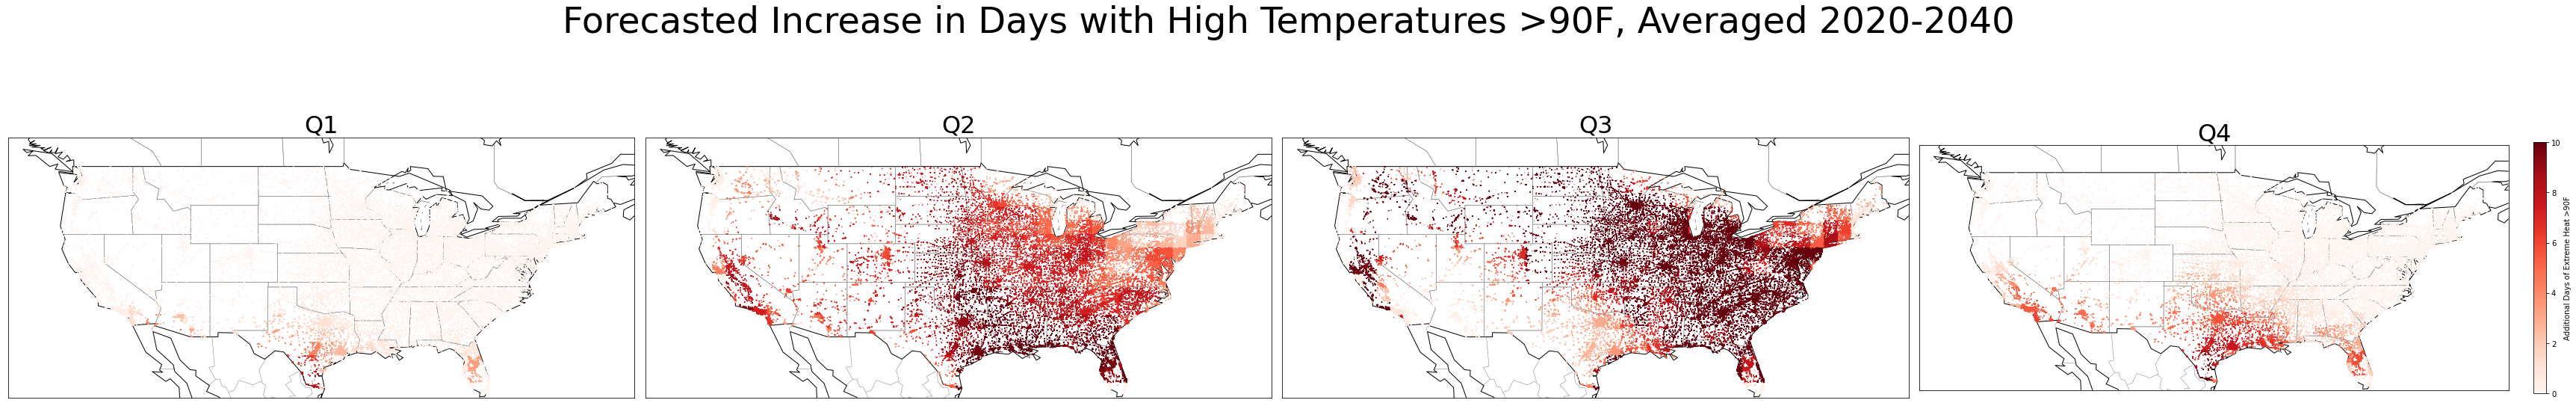

In [225]:
fig = plt.figure(figsize = (48, 32))
vmin = 0
vmax = 10



######################
# q1
ax = fig.add_subplot(141)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q1']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.tasmax90FChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Reds',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees) # 
          # cmap="RdBu",)
plt.title("Q1", fontsize = 32)


######################
# q2
ax = fig.add_subplot(142)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q2']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.tasmax90FChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Reds',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q2", fontsize = 32)


######################
# q3
ax = fig.add_subplot(143)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q3']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.tasmax90FChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Reds',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q3", fontsize = 32)


######################
# q4
ax = fig.add_subplot(144)

quarterly = locDataWithWeather[locDataWithWeather.quarter == 'q4']

lat = quarterly.latitude.values
lon = quarterly.longitude.values
   
m = Basemap(llcrnrlon=-130, llcrnrlat=25, urcrnrlon=-65.,urcrnrlat=52.,
            lat_0 = 40., lon_0 = -80)
    
    
m.drawcountries(linewidth=1, color = 'black')
m.drawstates(linewidth=0.5, color = 'grey')
m.drawcoastlines(linewidth=1, color = 'black')
    
    
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = ".", 
          c = quarterly.tasmax90FChange,
          zorder=5,
          vmin = vmin, 
          vmax = vmax, cmap = 'Reds',# edgecolor="k", ,linewidths=.05 
          s = quarterly.locationFracOfEmployees)  # 
          # cmap="RdBu",)
plt.title("Q4", fontsize = 32)
plt.colorbar(label="Additional Days of Extreme Heat >90F", fraction=0.02, pad=0.04)
fig.tight_layout()


# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=-.2)
fig.suptitle('Forecasted Increase in Days with High Temperatures >90F, Averaged 2020-2040', fontsize = 48)
fig.subplots_adjust(top=1.65)


In [167]:
locDataWithWeather.head()

,parent_number,latitude,longitude,zipcode,locationFracOfEmployees,quarter,prChange,tasmax90FChange
0,435388,44.92883,-93.12358,55102.0,1.0,q1,0.553333,0.000000
1,435388,44.92883,-93.12358,55102.0,1.0,q2,0.413333,5.954185
2,435388,44.92883,-93.12358,55102.0,1.0,q3,0.064762,10.653484
3,435388,44.92883,-93.12358,55102.0,1.0,q4,0.260952,0.000000
4,6958797,44.91445,-93.14212,55102.0,1.0,q1,0.553333,0.000000


# Find Own and Supplier Changes

In [301]:
locDataWithWeather = pd.read_csv("../../data/companyData/locDataWithWeatherPreds.csv").drop(columns = 'Unnamed: 0')


locDataWithWeather_byFirm = locDataWithWeather.drop(columns = {'latitude', 'longitude'})

locDataWithWeather_byFirm.prChange     = locDataWithWeather_byFirm.prChange     * locDataWithWeather_byFirm.locationFracOfEmployees
locDataWithWeather_byFirm.tasmax90FChange = locDataWithWeather_byFirm.tasmax90FChange * locDataWithWeather_byFirm.locationFracOfEmployees

# locDataWithWeather_byFirm.drop(columns = {'locationFracOfEmployees'}, inplace = True)
locDataWithWeather_byFirm.head()


,parent_number,zipcode,locationFracOfEmployees,quarter,prChange,tasmax90FChange
0,435388,55102.0,1.0,q1,0.553333,0.000000
1,435388,55102.0,1.0,q2,0.413333,5.954185
2,435388,55102.0,1.0,q3,0.064762,10.653484
3,435388,55102.0,1.0,q4,0.260952,0.000000
4,6958797,55102.0,1.0,q1,0.553333,0.000000


In [302]:
weatherPreds_byFirm = locDataWithWeather_byFirm.groupby(['quarter','parent_number']).sum().reset_index()
# weatherPreds_byFirm.prChange = weatherPreds_byFirm.prChange - 4.5
weatherPreds_byFirm.head()

,quarter,parent_number,zipcode,locationFracOfEmployees,prChange,tasmax90FChange
0,q1,7609,66814.0,2.000000,0.398095,0.102456
1,q1,9852,54962.0,0.983607,0.546604,0.000000
2,q1,12559,30523.0,1.000000,0.308571,0.000000
3,q1,15578,13212.0,1.538549,0.877706,0.000000
4,q1,21311,53007.0,0.718686,0.260096,0.000000


In [303]:
weatherPreds_byFirm.locationFracOfEmployees.describe()

count    333844.000000
mean          1.302750
std           0.557722
min           0.100020
25%           0.945652
50%           1.000000
75%           1.919054
max           2.000000
Name: locationFracOfEmployees, dtype: float64

In [304]:
weatherPreds_byFirm.tasmax90FChange.describe()

count    333844.000000
mean          4.893155
std           6.239678
min          -0.002105
25%           0.005714
50%           2.012919
75%           8.096645
max          48.966617
Name: tasmax90FChange, dtype: float64

In [305]:
weatherPreds_byFirm.prChange.describe()

count    333844.000000
mean          0.385409
std           0.529572
min          -2.120000
25%           0.059048
50%           0.319478
75%           0.662134
max           4.163810
Name: prChange, dtype: float64

In [306]:
weatherPreds_byFirm.rename(columns = {'parent_number': 'abi'},inplace = True)
weatherPreds_byFirm.drop(columns= {'zipcode'}, inplace = True)

In [308]:
linkingTable = pd.read_csv('../../data/companyData/sc_linkingTable.csv').drop(columns = {'Unnamed: 0',
                                                                                        'cstatCompanies',
                                                                                        'igCompanies'})
linkingTable.head()

,gvkey,abi
0,1562,4378204
1,2484,849416722
2,4274,9546995
3,14835,2406528
4,26520,479790834


In [310]:
weatherPreds_byFirm = weatherPreds_byFirm.merge(linkingTable)

In [311]:
weatherPreds_byFirm.head()

,quarter,abi,locationFracOfEmployees,prChange,tasmax90FChange,gvkey
0,q1,7609,2.000000,0.398095,0.102456,9799
1,q2,7609,2.000000,-0.034286,22.529023,9799
2,q3,7609,2.000000,-0.373333,36.828772,9799
3,q4,7609,2.000000,1.417143,3.897544,9799
4,q1,100537,1.218738,0.436948,0.000853,3937


In [312]:
weatherPreds_byFirm

,quarter,abi,locationFracOfEmployees,prChange,tasmax90FChange,gvkey
0,q1,7609,2.000000,0.398095,0.102456,9799
1,q2,7609,2.000000,-0.034286,22.529023,9799
2,q3,7609,2.000000,-0.373333,36.828772,9799
3,q4,7609,2.000000,1.417143,3.897544,9799
4,q1,100537,1.218738,0.436948,0.000853,3937
...,...,...,...,...,...,...
18483,q4,998861421,1.000000,-0.006667,0.065664,21017
18484,q1,998971592,0.943396,0.538185,0.000000,124595
18485,q2,998971592,0.943396,0.513028,2.766208,124595
18486,q3,998971592,0.943396,0.859838,8.090367,124595


## Direct Effects

In [313]:
weatherPreds_byFirm.head()

,quarter,abi,locationFracOfEmployees,prChange,tasmax90FChange,gvkey
0,q1,7609,2.000000,0.398095,0.102456,9799
1,q2,7609,2.000000,-0.034286,22.529023,9799
2,q3,7609,2.000000,-0.373333,36.828772,9799
3,q4,7609,2.000000,1.417143,3.897544,9799
4,q1,100537,1.218738,0.436948,0.000853,3937


In [314]:
sum(weatherPreds_byFirm.gvkey.isin(goodsData.gvkey))

6888

In [ ]:
weatherPreds_byFirm['gvkey'] = weatherPreds_byFirm['gvkey'].astype('int64')

In [315]:
goodsData = pd.read_csv("../../data/companyData/goodsData_0320.csv")[['gvkey']].drop_duplicates()
# goodsData['gvkey'] = goodsData['gvkey'].astype('object')
goodsData = goodsData.merge(weatherPreds_byFirm)

goodsData.gvkey

0       160635
1       160635
2       160635
3       160635
4        65158
         ...  
6883     35077
6884     19104
6885     19104
6886     19104
6887     19104
Name: gvkey, Length: 6888, dtype: int64

In [316]:
goodsData.head()

,gvkey,quarter,abi,locationFracOfEmployees,prChange,tasmax90FChange
0,160635,q1,530472216,2.000000,0.269758,0.550167
1,160635,q2,530472216,2.000000,-1.075668,12.198970
2,160635,q3,530472216,2.000000,1.976328,3.239441
3,160635,q4,530472216,2.000000,-0.004143,8.175249
4,65158,q1,957733751,1.847222,0.262884,0.001124


## Indirect Effects

In [324]:
allSuppliers = pd.read_csv("../../data/companyData/allSupplierCustomerData.csv").\
    drop(columns = {'Unnamed: 0'}).rename(columns = {'supplier_zipcode': 'zipcode',
                                                    'customer_gvkey': 'gvkey'})\
    [['gvkey']].drop_duplicates().merge(weatherPreds_byFirm)
allSuppliers.head()

,gvkey,quarter,abi,locationFracOfEmployees,prChange,tasmax90FChange
0,61718.0,q1,712379885,2.000000,0.358095,0.000000
1,61718.0,q2,712379885,2.000000,-0.822857,0.143258
2,61718.0,q3,712379885,2.000000,1.436190,0.770927
3,61718.0,q4,712379885,2.000000,-0.013333,0.131328
4,61718.0,q1,891493322,1.972632,0.843258,0.066065


In [325]:
worstSuppliers = allSuppliers# .groupby(['year','gvkey','qtr']).median().reset_index()

print(worstSuppliers.shape,allSuppliers.shape)

worstSuppliers.head()

(3960, 6) (3960, 6)


,gvkey,quarter,abi,locationFracOfEmployees,prChange,tasmax90FChange
0,61718.0,q1,712379885,2.000000,0.358095,0.000000
1,61718.0,q2,712379885,2.000000,-0.822857,0.143258
2,61718.0,q3,712379885,2.000000,1.436190,0.770927
3,61718.0,q4,712379885,2.000000,-0.013333,0.131328
4,61718.0,q1,891493322,1.972632,0.843258,0.066065


Now find some summary statistics here.

In [329]:
indirEffects = worstSuppliers[['gvkey','prChange','tasmax90FChange']]
indirEffects.prChange = indirEffects.prChange*1.1
indirEffects.tasmax90FChange = indirEffects.tasmax90FChange*.454


dirEffects   = goodsData[['gvkey','prChange','tasmax90FChange']]
dirEffects.prChange = dirEffects.prChange*1.95
dirEffects.tasmax90FChange = dirEffects.tasmax90FChange*.869
dirEffects

,gvkey,prChange,tasmax90FChange
0,160635,0.526029,0.478095
1,160635,-2.097552,10.600905
2,160635,3.853839,2.815074
3,160635,-0.008079,7.104291
4,65158,0.512623,0.000977
...,...,...,...
6883,35077,-0.061250,6.917037
6884,19104,0.367611,0.487763
6885,19104,0.275751,2.540548
6886,19104,-0.073863,2.480764


In [332]:
dirEffects.to_csv("../../data/companyData/dirEffectsWithWeatherPreds.csv")
indirEffects.to_csv("../../data/companyData/indirEffectsWithWeatherPreds.csv")

In [4]:
dirEffects   = pd.read_csv("../../data/companyData/dirEffectsWithWeatherPreds.csv")
indirEffects = pd.read_csv("../../data/companyData/indirEffectsWithWeatherPreds.csv")

In [14]:
print(dirEffects[['tasmax90FChange']].describe()/.869)

print(dirEffects[['prChange']].describe()/1.95)

       tasmax90FChange
count      7926.352129
mean          4.426611
std           5.550449
min          -0.000834
25%           0.064701
50%           2.094220
75%           7.116520
max          48.966617
          prChange
count  3532.307692
mean      0.353201
std       0.555405
min      -1.590476
25%       0.020000
50%       0.263019
75%       0.641988
max       3.023810


In [7]:
dirEffects[['prChange','tasmax90FChange']].describe()

,prChange,tasmax90FChange
count,6888.000000,6888.000000
mean,0.688741,3.846725
std,1.083041,4.823340
min,-3.101429,-0.000725
25%,0.039000,0.056225
50%,0.512888,1.819877
75%,1.251877,6.184256
max,5.896429,42.551990


In [15]:
print(indirEffects[['tasmax90FChange']].describe()/.454)

print(indirEffects[['prChange']].describe()/1.1)

       tasmax90FChange
count      8722.466960
mean          3.705693
std           4.887761
min          -0.000834
25%           0.022610
50%           1.560415
75%           5.782845
max          33.195027
          prChange
count  3600.000000
mean      0.311086
std       0.479487
min      -1.531570
25%       0.036997
50%       0.216067
75%       0.525133
max       2.685714


In [8]:
indirEffects[['prChange','tasmax90FChange']].describe()

,prChange,tasmax90FChange
count,3960.000000,3960.000000
mean,0.342194,1.682385
std,0.527435,2.219043
min,-1.684727,-0.000379
25%,0.040697,0.010265
50%,0.237674,0.708428
75%,0.577647,2.625412
max,2.954286,15.070542


In [11]:
effectsAll[['prChange','tasmax90FChange']].describe()

,prChange,tasmax90FChange
count,3960.000000,3960.000000
mean,1.147564,5.579940
std,1.328972,6.137448
min,-3.082751,-0.000661
25%,0.319980,0.376518
50%,1.035054,3.687528
75%,1.927687,9.110020
max,6.428135,46.040063


In [9]:
effectsAll = dirEffects + indirEffects
variables    = ['Extreme Heat','Extreme Rain','Extreme Heat','Extreme Rain']
allEffects = pd.DataFrame()
allEffects['variables']  = variables
allEffects['effectSize'] = effectsAll
allEffects['dirIndir']   = ['dir','dir','indir','indir']
# allEffects['variables'] = variables
allEffects.head()

ValueError: Wrong number of items passed 4, placement implies 1

------------------------------

# Code Graveyard




In [97]:
weather = 'pr'
scenario = 'ssp585'

file1 = '../../../../../../../Volumes/backup2/dissData/cmip6Data/proj/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn_20150101-20241231.nc'
file2 = '../../../../../../../Volumes/backup2/dissData/cmip6Data/proj/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn_20250101-20341231.nc'
file3 = '../../../../../../../Volumes/backup2/dissData/cmip6Data/proj/' + weather + '/' + weather + '_day_MIROC6_' + scenario + '_r*i1p1f1_gn_20350101-20441231.nc'

data1 = xr.open_mfdataset(file1,concat_dim=['ensemble'],combine='nested',decode_times=True)
data2 = xr.open_mfdataset(file2,concat_dim=['ensemble'],combine='nested',decode_times=True)
data3 = xr.open_mfdataset(file3,concat_dim=['ensemble'],combine='nested',decode_times=True)

data = xr.combine_by_coords([data1,data2,data3])

In [23]:
prExtremes_q1 = (1*(prFuture.where(prFuture.time.dt.quarter == 1, drop = True).pr - 
     pr95s.where(pr95s.quarter == 1, drop = True)) > 0)

prQ1Avg = prExtremes_q1.groupby(prExtremes_q1.time.dt.year).\
    sum(dim = ['time','quarter']).mean(dim = ['year','ensemble']).compute(workers = 100)


### q2 
'''prExtremes_q2 = (1*(prFuture.where(prFuture.time.dt.quarter == 2, drop = True).pr - 
     pr95s.where(pr95s.quarter == 2, drop = True)) > 0)

prQ2Avg = prExtremes_q2.groupby(prExtremes_q2.time.dt.year).\
    sum(dim = ['time','quarter']).mean(dim = ['year','ensemble']).compute(workers = 100)



### q3 
prExtremes_q3 = (1*(prFuture.where(prFuture.time.dt.quarter == 3, drop = True).pr - 
     pr95s.where(pr95s.quarter == 3, drop = True)) > 0)

prQ3Avg = prExtremes_q3.groupby(prExtremes_q3.time.dt.year).\
    sum(dim = ['time','quarter']).mean(dim = ['year','ensemble']).compute(workers = 100)



### q4
prExtremes_q4 = (1*(prFuture.where(prFuture.time.dt.quarter == 4, drop = True).pr - 
     pr95s.where(pr95s.quarter == 4, drop = True)) > 0)

prQ4Avg = prExtremes_q4.groupby(prExtremes_q4.time.dt.year).\
    sum(dim = ['time','quarter']).mean(dim = ['year','ensemble']).compute(workers = 100)
'''

prQ1Avg

<xarray.DataArray 'pr' (lat: 25, lon: 64)>
array([[4.2847619 , 4.16285714, 4.26380952, ..., 4.66761905, 4.68761905,
        4.66761905],
       [4.29428571, 4.20095238, 4.22761905, ..., 4.99047619, 4.93238095,
        4.77619048],
       [4.3       , 4.23047619, 4.29428571, ..., 4.91238095, 4.9152381 ,
        4.94571429],
       ...,
       [5.1647619 , 5.12      , 5.17238095, ..., 5.20952381, 5.11333333,
        5.14380952],
       [5.12952381, 5.09238095, 5.05809524, ..., 5.33238095, 5.26571429,
        5.1047619 ],
       [5.14190476, 5.11428571, 5.07142857, ..., 5.37238095, 5.2       ,
        5.19714286]])
Coordinates:
  * lat      (lat) float64 21.71 23.11 24.51 25.91 ... 51.13 52.53 53.93 55.33
  * lon      (lon) float64 -157.5 -156.1 -154.7 -153.3 ... -71.72 -70.31 -68.91

In [ ]:
file = open('../../data/companyData/miroc_historical95s.pkl','rb')
percentileByEnsemble = pkl.load(file)

In [ ]:
percentileByEnsemble

In [ ]:
# numpy and xarray and all that
# https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/

In [ ]:
data.ensemble == 1

In [ ]:
# https://metview.readthedocs.io/en/latest/examples/ens_mean_spread_xarray.html
# data.mean(dim = 'ensemble')
overall = data.mean(dim = ['lat','lon'])
overall.pr.plot(hue = 'ensemble')

In [ ]:
plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (13, 5)
ens.tas.plot(hue="realization")
plt.show()

In [ ]:
# this takes the ensemble mean and then the mean over time
data_emean = data.mean()# .mean() 
print(data_emean)

In [ ]:
import glob

import xarray as xr

import xclim as xc

# Set display to HTML sytle (for fancy output)
xr.set_options(display_style="html", display_width=50)

import matplotlib.pyplot as plt

%matplotlib inline

from xclim import ensembles

In [ ]:
len(glob.glob('../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r1*i1p1f1_gn_19800101-19891231.nc'))
datasets = glob.glob('../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/pr/pr_day_MIROC6_historical_r1*i1p1f1_gn_19800101-19891231.nc')
datasets

In [ ]:
# file = 
# data = xr.open_mfdataset(file,concat_dim='ensemble',combine='nested',decode_times=True)

ens = ensembles.create_ensemble(datasets, mf_flag = True)

In [ ]:
geoHQ = gpd.GeoDataFrame(
    allIG,
    geometry=gpd.points_from_xy(
        allIG["longitude"],
        allIG["latitude"],
    ),
    crs={"init":"EPSG:4326"},
)

In [ ]:
one_point = data["pr"].sel(lat=50, lon=50)

In [ ]:
pd.DataFrame(test.temperature[test.year == 2010]).plot()

Now go through and make this iterable for the entire list.

In [ ]:
i = 0
data.pr.sel(allIG.iloc[0,:], method='nearest')

In [ ]:
hqPost2010 = geoHQ[geoHQ.archive_version_year > 2010].reset_index()

In [ ]:
start = time.time()



tempsList = list()
for i in range(0,hqPost2010.shape[0]):
    nearbyTemps = temps.sel(hqPost2010.loc[i,['latitude','longitude']], method='nearest')
    
    tempsList.append(list(np.array(nearbyTemps.temperature[nearbyTemps.year == hqPost2010.archive_version_year[i]])))

    if (i%100 == 0):
        print(i)
    
print(time.time() - start)






In [ ]:
outfile =  'data/hqDailyTemperatures.pkl'
with open(outfile, 'wb') as pickle_file:
    pickle.dump(tempsList, pickle_file)

# Now let's do the percentiles

In [ ]:
baselineName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/hist/mirocHQs_198199.csv'
baseline = pd.read_csv(baselineName)

In [ ]:
baseline.s.unique()

In [ ]:
baseline[baseline.variable == 'tasmax_hist']

In [ ]:
quantsPrecip   = baseline[baseline.variable == 'pr_hist'][['zipcode','variable','quarter','value']].\
    groupby(['zipcode','variable','quarter']).quantile(.95).reset_index()
quantsPrecip.rename(columns = {'value': 'quantCutoff'}, inplace = True)
quantsPrecip['daysExtreme'] = 4.5


In [ ]:
quantsPrecip.head()

Find number of days above 90F.

In [ ]:
temp = baseline[baseline.variable == 'tasmax_hist'].drop(columns = {'s','year'})
temp.head()

In [ ]:
quantsTemp = baseline[baseline.variable == 'tasmax_hist'].drop(columns = {'s','year'})
quantsTemp['daysExtreme'] = 1*(quantsTemp.value > 305.3)
quantsTemp = quantsTemp.groupby(['zipcode', 'variable', 'quarter']).median().reset_index()
quantsTemp.rename(columns = {'value': 'quantCutoff'}, inplace = True)

quantsTemp.daysExtreme = quantsTemp.daysExtreme*90
quantsTemp.quantCutoff = 305.3


quantsTemp.head()

In [ ]:
quantsPrecip.head()

In [ ]:
quants = quantsPrecip.append(quantsTemp)

In [ ]:
quants.head()

And apply them to the next period.

In [ ]:
nextPeriodName = '../../../../../../../Volumes/backup2/dissData/cmip6Data/proj/mirocHQs_202040.csv'
nextPeriod = pd.read_csv(nextPeriodName)# .drop(columns = ['s'])

In [ ]:
nextPeriod.shape[0]/len(nextPeriod.zipcode.unique())/365/18/2/4

In [ ]:
nextPeriod.head()

In [ ]:
quants.daysExtreme

In [ ]:
nextPeriod = nextPeriod.merge(quants)
nextPeriod.head()

In [ ]:
nextPeriod['extreme'] = 1*(nextPeriod.value > nextPeriod.quantCutoff)

In [ ]:
# nextPeriod.to_csv("../../data/companyData/nextPeriodExtremes.csv")

In [ ]:
nextPeriod.head()

In [ ]:
nextPeriod.year

In [ ]:
nextPeriod['yearQuarter'] = nextPeriod.year.astype('int64') + nextPeriod.quarter.str[1:2].astype('int64')/4

In [ ]:
nextPeriod.head()

In [ ]:
nextPeriod[['zipcode']].drop_duplicates().shape

In [ ]:
nextPeriod.head()

In [ ]:
nextPeriod[nextPeriod.variable == 'pr_hist'].extreme.describe()

In [ ]:
quarterlyExtremes = nextPeriod[['variable','s','year','quarter','yearQuarter','zipcode','extreme']].\
    groupby(['variable','s','year','quarter','yearQuarter','zipcode']).sum().reset_index()

In [ ]:
zipLats = pd.read_csv("../../data/companyData/quarterlyExtremesMean.csv")[['zipcode','latitude','longitude']].\
    groupby(['zipcode']).mean().reset_index()

quarterlyExtremes = quarterlyExtremes.merge(zipLats)

In [ ]:
quarterlyExtremes.head()

In [ ]:
quarterlyExtremes.head()

In [ ]:
quarterlyExtremes.to_csv("../../data/companyData/quarterlyExtremesAll.csv")

In [ ]:
quarterlyExtremesMean = quarterlyExtremes[['variable','quarter','zipcode','latitude','longitude','extreme']].\
    groupby(['variable','quarter','zipcode','latitude','longitude']).mean().reset_index()

In [ ]:
quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].extreme.describe()

In [ ]:
quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].extreme.describe()

In [ ]:
quarterlyExtremesMean.head()

In [ ]:
quarterlyExtremesMean = quarterlyExtremesMean.merge(quants[['zipcode','variable','quarter','daysExtreme']])
quarterlyExtremesMean.head()

In [ ]:
quarterlyExtremesMean.to_csv("../../data/companyData/quarterlyExtremesMean.csv")

In [ ]:
zipLats.head()

In [ ]:
quarterlyExtremesMean.groupby(['variable']).extreme.describe()

------------------------------

In [ ]:
# we might have multiple records from within the same zipcode
quarterlyExtremesMean = quarterlyExtremes[['variable','quarter','zipcode','extreme']].\
    groupby(['variable','quarter','zipcode']).mean().reset_index()

# .groupby(['variable','quarter','zipcode']).mean().reset_index()


In [ ]:
quarterlyExtremesMean.groupby('variable').extreme.hist(bins = 100)

In [ ]:
(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].extreme - 4.5).hist(bins = 100)

In [ ]:
(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].extreme - 4.5).hist(bins = 100)

In [ ]:
sum(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].extreme > 4.5)/quarterlyExtremesMean[quarterlyExtremesMean.variable == 'pr_hist'].shape[0]

In [ ]:
sum(quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].\
    extreme > 4.5)/quarterlyExtremesMean[quarterlyExtremesMean.variable == 'tasmax_hist'].shape[0]